In [1]:
import librosa
import os
import numpy as np
import pandas as pd

import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt

# Gearing up

In [2]:
path=r"E:\Machine Learning_Deep Learning\Audio-Speech\Music Instrument Classifier\dataset\banjo"

In [3]:
file="banjo_A3_very-long_forte_normal.wav"

x1,sr=librosa.load(os.path.join(path,file))
x2,_=librosa.load('violin_As3_phrase_mezzo-piano_arco-tremolo.wav')
x3,_=librosa.load('violin_A3_phrase_fortissimo_arco-au-talon.wav')
x3_fix=librosa.util.fix_length(x3,66150)
x4,_=librosa.load('violin_As5_1_mezzo-forte_con-sord.wav')
x4_fix=librosa.util.fix_length(x4,66150)
x5,_=librosa.load('cello_A3_1_pianissimo_arco-normal.wav')
x6,_=librosa.load('cello_A2_1_pianissimo_arco-normal.wav')

In [4]:
dur=librosa.get_duration(x4)
dur

1.8285714285714285

In [5]:
print(x1.size)
print(x2.size)
print(x3.size)
print(x4.size)
print(x5.size)
print(x6.size)

76608
68544
51264
40320
33408
27648


In [6]:
y1=librosa.feature.mfcc(x1, n_mfcc=13, n_fft=2048, hop_length=512)
y1.size

1950

In [7]:
y2=librosa.feature.mfcc(x2, n_mfcc=13, n_fft=2048, hop_length=512)
y2.size

1742

In [8]:
y3=librosa.feature.mfcc(x3_fix, n_mfcc=13, n_fft=2048, hop_length=512)
print(y3.size)

y4=librosa.feature.mfcc(x4_fix, n_mfcc=13, n_fft=2048, hop_length=512)
print(y4.size)

1690
1690


In [9]:
y3.shape

(13, 130)

In [10]:
len(x1)

76608

In [11]:
ipd.Audio('violin_As3_phrase_mezzo-piano_arco-tremolo.wav')

In [12]:
ipd.Audio('violin_A3_phrase_fortissimo_arco-au-talon.wav')

Text(0.5, 1.0, 'x3_fix')

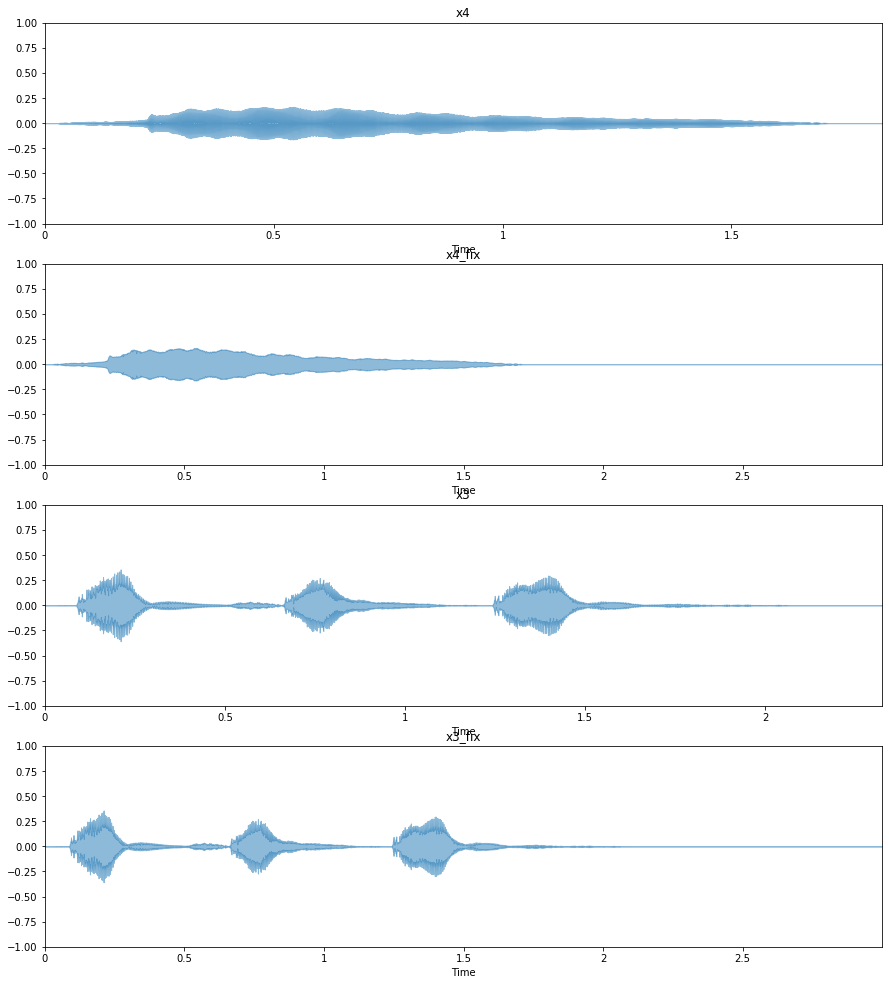

In [13]:
plt.figure(figsize=(15, 17))

plt.subplot(4, 1, 1)
librosa.display.waveplot(x4, alpha=0.5)
plt.ylim((-1, 1))
plt.title("x4")

plt.subplot(4, 1, 2)
librosa.display.waveplot(x4_fix, alpha=0.5)
plt.ylim((-1, 1))
plt.title("x4_fix")

plt.subplot(4, 1, 3)
librosa.display.waveplot(x3, alpha=0.5)
plt.ylim((-1, 1))
plt.title("x3")

plt.subplot(4, 1, 4)
librosa.display.waveplot(x3_fix, alpha=0.5)
plt.ylim((-1, 1))
plt.title("x3_fix")






# Preprocessing for NN

In [14]:
dataset_path='dataset'

In [15]:
data={
     'mfcc':[],
     'label':[]
     }

In [16]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    print('Processing ', dirpath.split("/")[-1])
    for f in filenames:
        print(i-1)
        fpath=os.path.join(dirpath,f)
        print(fpath)
        
        x,sr=librosa.load(fpath)
        x=librosa.util.fix_length(x,66150)
        mfcc=librosa.feature.mfcc(x, n_mfcc=13, n_fft=2048, hop_length=512)
        mfcc=mfcc.T
        
        data['mfcc'].append(np.hstack(mfcc))
        data['label'].append(i-1)
        

Processing  dataset
Processing  dataset\banjo
0
dataset\banjo\banjo_A3_very-long_forte_normal.wav
0
dataset\banjo\banjo_A3_very-long_piano_normal.wav
0
dataset\banjo\banjo_A4_very-long_forte_normal.wav
0
dataset\banjo\banjo_A4_very-long_piano_normal.wav
0
dataset\banjo\banjo_A5_very-long_forte_normal.wav
0
dataset\banjo\banjo_A5_very-long_piano_normal.wav
0
dataset\banjo\banjo_As3_very-long_forte_normal.wav
0
dataset\banjo\banjo_As3_very-long_piano_normal.wav
0
dataset\banjo\banjo_As4_very-long_forte_normal.wav
0
dataset\banjo\banjo_As4_very-long_piano_normal.wav
0
dataset\banjo\banjo_As5_very-long_forte_normal.wav
0
dataset\banjo\banjo_As5_very-long_piano_normal.wav
0
dataset\banjo\banjo_B3_very-long_forte_normal.wav
0
dataset\banjo\banjo_B3_very-long_piano_normal.wav
0
dataset\banjo\banjo_B4_very-long_forte_normal.wav
0
dataset\banjo\banjo_B4_very-long_piano_normal.wav
0
dataset\banjo\banjo_B5_very-long_forte_normal.wav
0
dataset\banjo\banjo_B5_very-long_piano_normal.wav
0
dataset\ba

1
dataset\bass clarinet\bass-clarinet_A5_025_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_025_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_05_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_05_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_05_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_15_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_15_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_15_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_1_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_1_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_A5_1_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_As2_025_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_As2_025_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_As2_025_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_As2_025_pianissimo_normal.wav
1
dataset\bass clarinet

1
dataset\bass clarinet\bass-clarinet_B3_phrase_mezzo-forte_nonlegato.wav
1
dataset\bass clarinet\bass-clarinet_B3_phrase_mezzo-forte_tongued-slur.wav
1
dataset\bass clarinet\bass-clarinet_B3_very-long_mezzo-piano_harmonic.wav
1
dataset\bass clarinet\bass-clarinet_B4_025_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_025_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_025_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_025_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_025_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_05_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_05_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_05_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_05_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_05_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_15_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_B4_15_fortissimo_normal.wav

1
dataset\bass clarinet\bass-clarinet_Cs4_05_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_05_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_05_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_15_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_15_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_15_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_15_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_15_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_1_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_1_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_1_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_1_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_1_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Cs4_phrase_forte_major-trill.wav
1
dataset\bass clarinet\bass-clarinet_Cs5_025_forte_normal.wav
1
dataset\bass clarine

1
dataset\bass clarinet\bass-clarinet_Ds2_025_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_025_mezzo-forte_staccato.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_025_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_025_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_05_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_05_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_05_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_05_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_05_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_15_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_15_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_15_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_15_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_15_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Ds2_1_forte_normal.wav
1
dataset\bass c

1
dataset\bass clarinet\bass-clarinet_E3_phrase_mezzo-forte_nonlegato.wav
1
dataset\bass clarinet\bass-clarinet_E3_phrase_mezzo-forte_staccatissimo.wav
1
dataset\bass clarinet\bass-clarinet_E3_phrase_mezzo-forte_tongued-slur.wav
1
dataset\bass clarinet\bass-clarinet_E4_025_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_025_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_025_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_025_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_025_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_05_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_05_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_05_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_05_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_05_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_15_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_E4_15_fortissimo_normal.w

1
dataset\bass clarinet\bass-clarinet_F5_1_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_F5_1_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_F5_1_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_F5_1_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_F5_1_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_025_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_025_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_025_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_025_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_025_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_05_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_05_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_05_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_05_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_Fs2_05_piano_normal.wav
1
dataset\bass clarinet\bas

1
dataset\bass clarinet\bass-clarinet_G3_phrase_mezzo-forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_G3_phrase_mezzo-forte_staccatissimo.wav
1
dataset\bass clarinet\bass-clarinet_G4_025_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_025_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_025_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_025_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_05_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_05_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_05_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_05_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_15_forte_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_15_fortissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_15_pianissimo_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_15_piano_normal.wav
1
dataset\bass clarinet\bass-clarinet_G4_1_forte_normal.wav
1
dataset\bass clarinet\b

2
dataset\bassoon\bassoon_A2_1_mezzo-forte_normal.wav
2
dataset\bassoon\bassoon_A2_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_A2_1_piano_normal.wav
2
dataset\bassoon\bassoon_A3_025_forte_normal.wav
2
dataset\bassoon\bassoon_A3_025_fortissimo_normal.wav
2
dataset\bassoon\bassoon_A3_025_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_A3_025_piano_normal.wav
2
dataset\bassoon\bassoon_A3_05_forte_normal.wav
2
dataset\bassoon\bassoon_A3_05_fortissimo_normal.wav
2
dataset\bassoon\bassoon_A3_05_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_A3_05_piano_normal.wav
2
dataset\bassoon\bassoon_A3_15_forte_normal.wav
2
dataset\bassoon\bassoon_A3_15_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_A3_15_piano_normal.wav
2
dataset\bassoon\bassoon_A3_1_forte_normal.wav
2
dataset\bassoon\bassoon_A3_1_fortissimo_normal.wav
2
dataset\bassoon\bassoon_A3_1_mezzo-forte_normal.wav
2
dataset\bassoon\bassoon_A3_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_A3_1_piano_normal.wav
2
dataset\bassoo

2
dataset\bassoon\bassoon_B3_1_forte_normal.wav
2
dataset\bassoon\bassoon_B3_1_mezzo-forte_normal.wav
2
dataset\bassoon\bassoon_B3_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_B3_1_piano_normal.wav
2
dataset\bassoon\bassoon_B3_long_forte_tremolo.wav
2
dataset\bassoon\bassoon_B4_025_forte_normal.wav
2
dataset\bassoon\bassoon_B4_025_fortissimo_normal.wav
2
dataset\bassoon\bassoon_B4_025_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_B4_025_piano_normal.wav
2
dataset\bassoon\bassoon_B4_05_forte_normal.wav
2
dataset\bassoon\bassoon_B4_05_fortissimo_normal.wav
2
dataset\bassoon\bassoon_B4_05_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_B4_05_piano_normal.wav
2
dataset\bassoon\bassoon_B4_15_forte_normal.wav
2
dataset\bassoon\bassoon_B4_15_piano_normal.wav
2
dataset\bassoon\bassoon_B4_1_forte_normal.wav
2
dataset\bassoon\bassoon_B4_1_fortissimo_normal.wav
2
dataset\bassoon\bassoon_B4_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_B4_1_piano_normal.wav
2
dataset\bassoon\bassoon

2
dataset\bassoon\bassoon_D2_025_forte_normal.wav
2
dataset\bassoon\bassoon_D2_025_fortissimo_normal.wav
2
dataset\bassoon\bassoon_D2_025_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_D2_025_piano_normal.wav
2
dataset\bassoon\bassoon_D2_05_forte_normal.wav
2
dataset\bassoon\bassoon_D2_05_fortissimo_normal.wav
2
dataset\bassoon\bassoon_D2_05_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_D2_05_piano_normal.wav
2
dataset\bassoon\bassoon_D2_15_fortissimo_normal.wav
2
dataset\bassoon\bassoon_D2_15_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_D2_15_piano_normal.wav
2
dataset\bassoon\bassoon_D2_1_forte_normal.wav
2
dataset\bassoon\bassoon_D2_1_fortissimo_normal.wav
2
dataset\bassoon\bassoon_D2_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_D2_1_piano_normal.wav
2
dataset\bassoon\bassoon_D3_025_forte_normal.wav
2
dataset\bassoon\bassoon_D3_025_fortissimo_normal.wav
2
dataset\bassoon\bassoon_D3_025_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_D3_025_piano_normal.wav
2
dataset\

2
dataset\bassoon\bassoon_E3_1_piano_normal.wav
2
dataset\bassoon\bassoon_E3_long_forte_major-trill.wav
2
dataset\bassoon\bassoon_E3_very-long_cresc-decresc_normal.wav
2
dataset\bassoon\bassoon_E4_025_forte_normal.wav
2
dataset\bassoon\bassoon_E4_025_fortissimo_normal.wav
2
dataset\bassoon\bassoon_E4_025_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_E4_025_piano_normal.wav
2
dataset\bassoon\bassoon_E4_05_forte_normal.wav
2
dataset\bassoon\bassoon_E4_05_fortissimo_normal.wav
2
dataset\bassoon\bassoon_E4_05_mezzo-forte_normal.wav
2
dataset\bassoon\bassoon_E4_05_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_E4_05_piano_normal.wav
2
dataset\bassoon\bassoon_E4_15_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_E4_1_forte_normal.wav
2
dataset\bassoon\bassoon_E4_1_mezzo-forte_normal.wav
2
dataset\bassoon\bassoon_E4_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_E4_1_piano_normal.wav
2
dataset\bassoon\bassoon_E4_long_forte_major-trill.wav
2
dataset\bassoon\bassoon_E4_very-long_cresc

2
dataset\bassoon\bassoon_G3_025_forte_normal.wav
2
dataset\bassoon\bassoon_G3_025_fortissimo_normal.wav
2
dataset\bassoon\bassoon_G3_025_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_G3_025_piano_normal.wav
2
dataset\bassoon\bassoon_G3_05_forte_normal.wav
2
dataset\bassoon\bassoon_G3_05_fortissimo_normal.wav
2
dataset\bassoon\bassoon_G3_05_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_G3_05_piano_normal.wav
2
dataset\bassoon\bassoon_G3_15_piano_normal.wav
2
dataset\bassoon\bassoon_G3_1_forte_normal.wav
2
dataset\bassoon\bassoon_G3_1_fortissimo_normal.wav
2
dataset\bassoon\bassoon_G3_1_mezzo-forte_normal.wav
2
dataset\bassoon\bassoon_G3_1_mezzo-piano_normal.wav
2
dataset\bassoon\bassoon_G3_1_piano_normal.wav
2
dataset\bassoon\bassoon_G3_long_forte_major-trill.wav
2
dataset\bassoon\bassoon_G3_phrase_mezzo-forte_legato.wav
2
dataset\bassoon\bassoon_G3_phrase_mezzo-forte_nonlegato.wav
2
dataset\bassoon\bassoon_G3_phrase_mezzo-forte_staccatissimo.wav
2
dataset\bassoon\bassoon_G3_phra

3
dataset\cello\cello_A5_025_pianissimo_arco-normal.wav
3
dataset\cello\cello_A5_05_forte_arco-normal.wav
3
dataset\cello\cello_A5_05_fortissimo_arco-normal.wav
3
dataset\cello\cello_A5_05_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_A5_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_A5_15_forte_arco-normal.wav
3
dataset\cello\cello_A5_15_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_A5_15_pianissimo_arco-normal.wav
3
dataset\cello\cello_A5_1_forte_arco-normal.wav
3
dataset\cello\cello_A5_1_fortissimo_arco-normal.wav
3
dataset\cello\cello_A5_1_mezzo-forte_arco-harmonic.wav
3
dataset\cello\cello_A5_1_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_A5_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_As2_025_forte_arco-normal.wav
3
dataset\cello\cello_As2_025_fortissimo_arco-normal.wav
3
dataset\cello\cello_As2_025_mezzo-forte_arco-col-legno-battuto.wav
3
dataset\cello\cello_As2_025_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_As2_025_pianissimo_arco-normal.wav
3
dat

3
dataset\cello\cello_C2_025_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_C2_05_forte_arco-normal.wav
3
dataset\cello\cello_C2_05_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_C2_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_C2_15_forte_arco-normal.wav
3
dataset\cello\cello_C2_15_fortissimo_arco-normal.wav
3
dataset\cello\cello_C2_15_pianissimo_arco-normal.wav
3
dataset\cello\cello_C2_15_piano_arco-normal.wav
3
dataset\cello\cello_C2_1_forte_arco-normal.wav
3
dataset\cello\cello_C2_1_fortissimo_arco-normal.wav
3
dataset\cello\cello_C2_1_mezzo-piano_arco-minor-trill.wav
3
dataset\cello\cello_C2_1_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_C2_1_mezzo-piano_molto-vibrato.wav
3
dataset\cello\cello_C2_1_mezzo-piano_non-vibrato.wav
3
dataset\cello\cello_C2_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_C2_1_piano_arco-major-trill.wav
3
dataset\cello\cello_C2_phrase_forte_con-sord.wav
3
dataset\cello\cello_C2_phrase_forte_molto-vibrato.wav
3
dataset\cello\cello_C2_ph

3
dataset\cello\cello_Cs4_05_forte_arco-normal.wav
3
dataset\cello\cello_Cs4_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_Cs4_15_forte_arco-normal.wav
3
dataset\cello\cello_Cs4_15_fortissimo_arco-normal.wav
3
dataset\cello\cello_Cs4_15_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Cs4_15_pianissimo_arco-normal.wav
3
dataset\cello\cello_Cs4_1_forte_arco-normal.wav
3
dataset\cello\cello_Cs4_1_fortissimo_arco-normal.wav
3
dataset\cello\cello_Cs4_1_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Cs4_1_mezzo-piano_non-vibrato.wav
3
dataset\cello\cello_Cs4_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_Cs5_025_forte_arco-normal.wav
3
dataset\cello\cello_Cs5_025_fortissimo_arco-normal.wav
3
dataset\cello\cello_Cs5_025_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Cs5_025_pianissimo_arco-normal.wav
3
dataset\cello\cello_Cs5_05_forte_arco-normal.wav
3
dataset\cello\cello_Cs5_05_fortissimo_arco-normal.wav
3
dataset\cello\cello_Cs5_05_mezzo-piano_arco-normal.wav
3
dataset\cel

3
dataset\cello\cello_Ds4_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_025_forte_arco-normal.wav
3
dataset\cello\cello_Ds5_025_fortissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_025_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Ds5_025_pianissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_05_forte_arco-normal.wav
3
dataset\cello\cello_Ds5_05_fortissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_05_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Ds5_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_15_forte_arco-normal.wav
3
dataset\cello\cello_Ds5_15_fortissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_15_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Ds5_15_pianissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_1_forte_arco-normal.wav
3
dataset\cello\cello_Ds5_1_fortissimo_arco-normal.wav
3
dataset\cello\cello_Ds5_1_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Ds5_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_Ds6_1_mezzo-forte_arco-harmonic.wav
3
datas

3
dataset\cello\cello_F5_05_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_F5_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_F5_15_forte_arco-normal.wav
3
dataset\cello\cello_F5_15_fortissimo_arco-normal.wav
3
dataset\cello\cello_F5_15_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_F5_1_forte_arco-normal.wav
3
dataset\cello\cello_F5_1_fortissimo_arco-normal.wav
3
dataset\cello\cello_F5_1_mezzo-forte_arco-harmonic.wav
3
dataset\cello\cello_F5_1_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_F5_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_Fs2_025_forte_arco-normal.wav
3
dataset\cello\cello_Fs2_025_fortissimo_arco-normal.wav
3
dataset\cello\cello_Fs2_025_mezzo-forte_arco-col-legno-battuto.wav
3
dataset\cello\cello_Fs2_025_pianissimo_arco-normal.wav
3
dataset\cello\cello_Fs2_025_piano_arco-normal.wav
3
dataset\cello\cello_Fs2_05_fortissimo_arco-normal.wav
3
dataset\cello\cello_Fs2_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_Fs2_05_piano_arco-normal.wav
3
dataset

3
dataset\cello\cello_G5_15_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_G5_15_pianissimo_arco-normal.wav
3
dataset\cello\cello_G5_1_forte_arco-normal.wav
3
dataset\cello\cello_G5_1_fortissimo_arco-normal.wav
3
dataset\cello\cello_G5_1_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_G5_1_pianissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_025_forte_arco-normal.wav
3
dataset\cello\cello_Gs2_025_fortissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_025_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Gs2_025_pianissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_05_forte_arco-normal.wav
3
dataset\cello\cello_Gs2_05_fortissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_05_mezzo-piano_arco-normal.wav
3
dataset\cello\cello_Gs2_05_pianissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_15_forte_arco-normal.wav
3
dataset\cello\cello_Gs2_15_fortissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_15_pianissimo_arco-normal.wav
3
dataset\cello\cello_Gs2_15_piano_arco-normal.wav
3
dataset\cello\cel

4
dataset\clarinet\clarinet_As3_05_pianissimo_normal.wav
4
dataset\clarinet\clarinet_As3_05_piano_normal.wav
4
dataset\clarinet\clarinet_As3_15_forte_normal.wav
4
dataset\clarinet\clarinet_As3_15_fortissimo_normal.wav
4
dataset\clarinet\clarinet_As3_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_As3_15_piano_normal.wav
4
dataset\clarinet\clarinet_As3_1_forte_normal.wav
4
dataset\clarinet\clarinet_As3_1_fortissimo_normal.wav
4
dataset\clarinet\clarinet_As3_1_pianissimo_normal.wav
4
dataset\clarinet\clarinet_As3_1_piano_normal.wav
4
dataset\clarinet\clarinet_As4_025_forte_normal.wav
4
dataset\clarinet\clarinet_As4_025_fortissimo_normal.wav
4
dataset\clarinet\clarinet_As4_025_pianissimo_normal.wav
4
dataset\clarinet\clarinet_As4_025_piano_normal.wav
4
dataset\clarinet\clarinet_As4_05_forte_normal.wav
4
dataset\clarinet\clarinet_As4_05_fortissimo_normal.wav
4
dataset\clarinet\clarinet_As4_05_pianissimo_normal.wav
4
dataset\clarinet\clarinet_As4_05_piano_normal.wav
4
dataset\clarinet\

4
dataset\clarinet\clarinet_C4_15_forte_normal.wav
4
dataset\clarinet\clarinet_C4_15_fortissimo_normal.wav
4
dataset\clarinet\clarinet_C4_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_C4_15_piano_normal.wav
4
dataset\clarinet\clarinet_C4_1_forte_normal.wav
4
dataset\clarinet\clarinet_C4_1_fortissimo_normal.wav
4
dataset\clarinet\clarinet_C4_1_pianissimo_normal.wav
4
dataset\clarinet\clarinet_C4_1_piano_normal.wav
4
dataset\clarinet\clarinet_C5_025_forte_normal.wav
4
dataset\clarinet\clarinet_C5_025_fortissimo_normal.wav
4
dataset\clarinet\clarinet_C5_025_pianissimo_normal.wav
4
dataset\clarinet\clarinet_C5_025_piano_normal.wav
4
dataset\clarinet\clarinet_C5_05_forte_normal.wav
4
dataset\clarinet\clarinet_C5_05_fortissimo_normal.wav
4
dataset\clarinet\clarinet_C5_05_pianissimo_normal.wav
4
dataset\clarinet\clarinet_C5_05_piano_normal.wav
4
dataset\clarinet\clarinet_C5_15_forte_normal.wav
4
dataset\clarinet\clarinet_C5_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_C5_15_pia

4
dataset\clarinet\clarinet_D4_very-long_cresc-decresc_normal.wav
4
dataset\clarinet\clarinet_D5_025_forte_normal.wav
4
dataset\clarinet\clarinet_D5_025_fortissimo_normal.wav
4
dataset\clarinet\clarinet_D5_025_pianissimo_normal.wav
4
dataset\clarinet\clarinet_D5_025_piano_normal.wav
4
dataset\clarinet\clarinet_D5_05_forte_normal.wav
4
dataset\clarinet\clarinet_D5_05_fortissimo_normal.wav
4
dataset\clarinet\clarinet_D5_05_pianissimo_normal.wav
4
dataset\clarinet\clarinet_D5_05_piano_normal.wav
4
dataset\clarinet\clarinet_D5_15_forte_normal.wav
4
dataset\clarinet\clarinet_D5_15_fortissimo_normal.wav
4
dataset\clarinet\clarinet_D5_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_D5_15_piano_normal.wav
4
dataset\clarinet\clarinet_D5_1_forte_normal.wav
4
dataset\clarinet\clarinet_D5_1_fortissimo_normal.wav
4
dataset\clarinet\clarinet_D5_1_pianissimo_normal.wav
4
dataset\clarinet\clarinet_D5_1_piano_normal.wav
4
dataset\clarinet\clarinet_D5_long_mezzo-forte_major-trill.wav
4
dataset\clar

4
dataset\clarinet\clarinet_E5_15_forte_normal.wav
4
dataset\clarinet\clarinet_E5_15_fortissimo_normal.wav
4
dataset\clarinet\clarinet_E5_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_E5_15_piano_normal.wav
4
dataset\clarinet\clarinet_E5_1_forte_normal.wav
4
dataset\clarinet\clarinet_E5_1_fortissimo_normal.wav
4
dataset\clarinet\clarinet_E5_1_pianissimo_normal.wav
4
dataset\clarinet\clarinet_E5_1_piano_normal.wav
4
dataset\clarinet\clarinet_E5_phrase_mezzo-forte_fluttertonguing.wav
4
dataset\clarinet\clarinet_E5_phrase_mezzo-forte_nonlegato.wav
4
dataset\clarinet\clarinet_E5_phrase_mezzo-forte_staccatissimo.wav
4
dataset\clarinet\clarinet_E5_phrase_mezzo-forte_staccato.wav
4
dataset\clarinet\clarinet_E5_phrase_mezzo-forte_tongued-slur.wav
4
dataset\clarinet\clarinet_E6_025_forte_normal.wav
4
dataset\clarinet\clarinet_E6_025_fortissimo_normal.wav
4
dataset\clarinet\clarinet_E6_025_pianissimo_normal.wav
4
dataset\clarinet\clarinet_E6_025_piano_normal.wav
4
dataset\clarinet\clarine

4
dataset\clarinet\clarinet_Fs5_05_piano_normal.wav
4
dataset\clarinet\clarinet_Fs5_15_forte_normal.wav
4
dataset\clarinet\clarinet_Fs5_15_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Fs5_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Fs5_15_piano_normal.wav
4
dataset\clarinet\clarinet_Fs5_1_forte_normal.wav
4
dataset\clarinet\clarinet_Fs5_1_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Fs5_1_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Fs5_1_piano_normal.wav
4
dataset\clarinet\clarinet_Fs6_025_forte_normal.wav
4
dataset\clarinet\clarinet_Fs6_025_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Fs6_025_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Fs6_025_piano_normal.wav
4
dataset\clarinet\clarinet_Fs6_05_forte_normal.wav
4
dataset\clarinet\clarinet_Fs6_05_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Fs6_05_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Fs6_05_piano_normal.wav
4
dataset\clarinet\clarinet_Fs6_15_forte_normal.wav
4
dataset\clarinet\clari

4
dataset\clarinet\clarinet_Gs5_very-long_cresc-decresc_normal.wav
4
dataset\clarinet\clarinet_Gs6_025_forte_normal.wav
4
dataset\clarinet\clarinet_Gs6_025_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_025_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_025_piano_normal.wav
4
dataset\clarinet\clarinet_Gs6_05_forte_normal.wav
4
dataset\clarinet\clarinet_Gs6_05_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_05_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_05_piano_normal.wav
4
dataset\clarinet\clarinet_Gs6_15_forte_normal.wav
4
dataset\clarinet\clarinet_Gs6_15_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_15_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_15_piano_normal.wav
4
dataset\clarinet\clarinet_Gs6_1_forte_normal.wav
4
dataset\clarinet\clarinet_Gs6_1_fortissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_1_pianissimo_normal.wav
4
dataset\clarinet\clarinet_Gs6_1_piano_normal.wav
Processing  dataset\contrabassoon
5
dataset\contrabassoon\con

5
dataset\contrabassoon\contrabassoon_As3_05_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_05_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_05_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_05_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_15_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_15_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_15_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_15_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_1_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_1_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_1_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_1_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_As3_long_forte_major-trill.wav
5
dataset\contrabassoon\contrabassoon_As3_long_forte_minor-trill.wav
5
dataset\contrabassoon\contrabassoon_B0_025_forte_normal.wav
5
dataset\contrabassoon\con

5
dataset\contrabassoon\contrabassoon_C3_phrase_mezzo-forte_staccatissimo.wav
5
dataset\contrabassoon\contrabassoon_C3_phrase_mezzo-forte_staccato.wav
5
dataset\contrabassoon\contrabassoon_C3_phrase_mezzo-forte_tenuto.wav
5
dataset\contrabassoon\contrabassoon_C3_phrase_mezzo-forte_tongued-slur.wav
5
dataset\contrabassoon\contrabassoon_C4_025_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_025_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_025_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_025_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_05_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_05_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_05_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_05_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_15_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_15_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_C4_15_mezzo-forte_norm

5
dataset\contrabassoon\contrabassoon_D3_1_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_D3_1_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_D3_1_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_D3_long_forte_fluttertonguing.wav
5
dataset\contrabassoon\contrabassoon_D3_long_forte_major-trill.wav
5
dataset\contrabassoon\contrabassoon_D3_long_forte_minor-trill.wav
5
dataset\contrabassoon\contrabassoon_D4_025_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_D4_05_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_D4_15_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_D4_1_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_D4_long_forte_major-trill.wav
5
dataset\contrabassoon\contrabassoon_D4_long_forte_minor-trill.wav
5
dataset\contrabassoon\contrabassoon_Ds1_025_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_Ds1_025_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_Ds1_025_mezzo-forte_normal.wav
5

5
dataset\contrabassoon\contrabassoon_F1_05_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_05_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_05_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_05_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_15_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_15_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_15_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_15_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_1_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_1_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_1_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_1_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_F1_phrase_mezzo-forte_legato.wav
5
dataset\contrabassoon\contrabassoon_F1_phrase_mezzo-forte_nonlegato.wav
5
dataset\contrabassoon\contrabassoon_F1_phrase_mezzo-forte_staccatissimo.wav
5
dataset\contra

5
dataset\contrabassoon\contrabassoon_G2_05_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_05_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_15_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_15_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_15_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_15_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_1_forte_fluttertonguing.wav
5
dataset\contrabassoon\contrabassoon_G2_1_forte_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_1_fortissimo_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_1_mezzo-forte_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_1_piano_normal.wav
5
dataset\contrabassoon\contrabassoon_G2_phrase_mezzo-forte_legato.wav
5
dataset\contrabassoon\contrabassoon_G2_phrase_mezzo-forte_nonlegato.wav
5
dataset\contrabassoon\contrabassoon_G2_phrase_mezzo-forte_staccatissimo.wav
5
dataset\contrabassoon\contrabassoon_G2_phrase_mezzo-forte_staccato.wav
5

6
dataset\cor anglais\english-horn_A4_15_forte_normal.wav
6
dataset\cor anglais\english-horn_A4_15_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_A4_15_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_A4_15_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_A4_15_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_A4_1_forte_normal.wav
6
dataset\cor anglais\english-horn_A4_1_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_A4_1_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_A4_1_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_A4_1_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_A4_phrase_mezzo-forte_staccatissimo.wav
6
dataset\cor anglais\english-horn_A5_025_forte_normal.wav
6
dataset\cor anglais\english-horn_A5_025_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_A5_025_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_A5_025_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_A5_025_pianissimo_

6
dataset\cor anglais\english-horn_B4_15_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_B4_15_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_B4_15_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_B4_1_forte_normal.wav
6
dataset\cor anglais\english-horn_B4_1_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_B4_1_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_B4_1_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_B4_1_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_B4_phrase_mezzo-forte_legato.wav
6
dataset\cor anglais\english-horn_B4_phrase_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_B4_phrase_mezzo-forte_staccato.wav
6
dataset\cor anglais\english-horn_B4_phrase_mezzo-forte_tenuto.wav
6
dataset\cor anglais\english-horn_B5_025_forte_normal.wav
6
dataset\cor anglais\english-horn_B5_025_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_B5_025_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_B5_02

6
dataset\cor anglais\english-horn_D5_025_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_D5_05_forte_normal.wav
6
dataset\cor anglais\english-horn_D5_05_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_D5_05_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_D5_05_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_D5_05_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_D5_15_forte_normal.wav
6
dataset\cor anglais\english-horn_D5_15_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_D5_15_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_D5_15_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_D5_15_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_D5_1_forte_normal.wav
6
dataset\cor anglais\english-horn_D5_1_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_D5_1_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_D5_1_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_D5_1_pianissimo_normal.wav
6
dat

6
dataset\cor anglais\english-horn_F3_025_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_F3_025_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_F3_025_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_F3_025_piano_normal.wav
6
dataset\cor anglais\english-horn_F3_05_forte_normal.wav
6
dataset\cor anglais\english-horn_F3_05_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_F3_05_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_F3_05_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_F3_05_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_F3_05_piano_normal.wav
6
dataset\cor anglais\english-horn_F3_15_forte_normal.wav
6
dataset\cor anglais\english-horn_F3_15_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_F3_15_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_F3_15_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_F3_15_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_F3_15_piano_normal.wav
6
datas

6
dataset\cor anglais\english-horn_Fs5_1_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_Fs5_1_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_Fs5_1_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_Fs5_1_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_G3_025_forte_normal.wav
6
dataset\cor anglais\english-horn_G3_025_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_G3_025_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_G3_025_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_G3_025_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_G3_025_piano_normal.wav
6
dataset\cor anglais\english-horn_G3_05_forte_normal.wav
6
dataset\cor anglais\english-horn_G3_05_fortissimo_normal.wav
6
dataset\cor anglais\english-horn_G3_05_mezzo-forte_normal.wav
6
dataset\cor anglais\english-horn_G3_05_mezzo-piano_normal.wav
6
dataset\cor anglais\english-horn_G3_05_pianissimo_normal.wav
6
dataset\cor anglais\english-horn_G3_05_piano_normal.wav


7
dataset\double bass\double-bass_A1_025_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_A1_025_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_A1_025_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_A1_025_piano_pizz-normal.wav
7
dataset\double bass\double-bass_A1_05_forte_arco-normal.wav
7
dataset\double bass\double-bass_A1_05_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_A1_05_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_A1_05_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_A1_05_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_A1_15_forte_arco-normal.wav
7
dataset\double bass\double-bass_A1_15_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_A1_15_piano_arco-normal.wav
7
dataset\double bass\double-bass_A1_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_A1_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_A1_1_mezzo-forte_arco-normal.wav
7

7
dataset\double bass\double-bass_As3_15_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_As3_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_As3_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_As3_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_As3_1_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_As3_1_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_B1_025_forte_arco-normal.wav
7
dataset\double bass\double-bass_B1_025_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_B1_025_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_B1_025_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_B1_025_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_B1_05_forte_arco-normal.wav
7
dataset\double bass\double-bass_B1_05_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_B1_05_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_B1_05_molto-pianissi

7
dataset\double bass\double-bass_C4_15_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_C4_15_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_C4_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_C4_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_C4_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_C4_1_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_C4_1_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_Cs1_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_Cs1_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_Cs1_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_Cs1_1_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_Cs1_1_piano_arco-normal.wav
7
dataset\double bass\double-bass_Cs2_025_forte_arco-normal.wav
7
dataset\double bass\double-bass_Cs2_025_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_Cs2_025_mezzo-forte_arco-normal.wav
7
datase

7
dataset\double bass\double-bass_D4_05_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_D4_15_forte_arco-normal.wav
7
dataset\double bass\double-bass_D4_15_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_D4_15_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_D4_15_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_D4_15_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_D4_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_D4_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_D4_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_D4_1_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_Ds1_15_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_Ds1_15_piano_arco-normal.wav
7
dataset\double bass\double-bass_Ds1_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_Ds1_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_Ds1_1_piano_arco-normal.wav
7
data

7
dataset\double bass\double-bass_E2_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_E2_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_E2_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_E2_1_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_E2_1_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_E2_1_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-au-talon.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-detache.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-legato.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-martele.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-portato.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-spiccato.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-staccato.wav
7
dataset\double bass\double-bass_E2_phrase_mezzo-forte_arco-tenuto.wav
7
dataset\double

7
dataset\double bass\double-bass_F4_05_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_F4_05_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_F4_05_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_F4_05_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_F4_15_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_F4_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_F4_1_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_F4_1_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_F4_1_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_F4_1_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_F4_1_piano_arco-normal.wav
7
dataset\double bass\double-bass_Fs1_025_forte_arco-normal.wav
7
dataset\double bass\double-bass_Fs1_025_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_Fs1_025_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_Fs1_025_mezzo-piano_arco-normal.wav
7


7
dataset\double bass\double-bass_G2_025_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_G2_025_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_G2_025_piano_arco-normal.wav
7
dataset\double bass\double-bass_G2_025_piano_pizz-normal.wav
7
dataset\double bass\double-bass_G2_05_forte_arco-normal.wav
7
dataset\double bass\double-bass_G2_05_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_G2_05_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_G2_05_mezzo-piano_arco-normal.wav
7
dataset\double bass\double-bass_G2_05_pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_G2_15_fortissimo_arco-normal.wav
7
dataset\double bass\double-bass_G2_15_mezzo-forte_arco-normal.wav
7
dataset\double bass\double-bass_G2_15_molto-pianissimo_arco-normal.wav
7
dataset\double bass\double-bass_G2_15_piano_arco-normal.wav
7
dataset\double bass\double-bass_G2_1_forte_arco-normal.wav
7
dataset\double bass\double-bass_G2_1_fortissimo_arco-normal.wav
7
datase

8
dataset\flute\flute_A4_05_piano_normal.wav
8
dataset\flute\flute_A4_15_forte_normal.wav
8
dataset\flute\flute_A4_15_mezzo-forte_normal.wav
8
dataset\flute\flute_A4_15_mezzo-piano_normal.wav
8
dataset\flute\flute_A4_15_pianissimo_normal.wav
8
dataset\flute\flute_A4_15_piano_normal.wav
8
dataset\flute\flute_A4_1_forte_normal.wav
8
dataset\flute\flute_A4_1_mezzo-forte_normal.wav
8
dataset\flute\flute_A4_1_mezzo-piano_normal.wav
8
dataset\flute\flute_A4_1_pianissimo_normal.wav
8
dataset\flute\flute_A4_1_piano_normal.wav
8
dataset\flute\flute_A4_long_mezzo-forte_major-trill.wav
8
dataset\flute\flute_A4_long_mezzo-forte_minor-trill.wav
8
dataset\flute\flute_A4_phrase_mezzo-forte_normal.wav
8
dataset\flute\flute_A4_very-long_cresc-decresc_normal.wav
8
dataset\flute\flute_A5_025_forte_normal.wav
8
dataset\flute\flute_A5_025_mezzo-forte_normal.wav
8
dataset\flute\flute_A5_025_mezzo-piano_normal.wav
8
dataset\flute\flute_A5_025_pianissimo_normal.wav
8
dataset\flute\flute_A5_025_piano_normal.wa

8
dataset\flute\flute_B5_1_piano_normal.wav
8
dataset\flute\flute_B5_long_piano_normal.wav
8
dataset\flute\flute_B6_025_forte_normal.wav
8
dataset\flute\flute_B6_025_mezzo-forte_normal.wav
8
dataset\flute\flute_B6_025_pianissimo_normal.wav
8
dataset\flute\flute_B6_025_piano_normal.wav
8
dataset\flute\flute_B6_05_forte_normal.wav
8
dataset\flute\flute_B6_05_mezzo-forte_normal.wav
8
dataset\flute\flute_B6_05_pianissimo_normal.wav
8
dataset\flute\flute_B6_05_piano_normal.wav
8
dataset\flute\flute_B6_15_forte_normal.wav
8
dataset\flute\flute_B6_15_mezzo-forte_normal.wav
8
dataset\flute\flute_B6_15_pianissimo_normal.wav
8
dataset\flute\flute_B6_15_piano_normal.wav
8
dataset\flute\flute_B6_1_forte_normal.wav
8
dataset\flute\flute_B6_1_mezzo-forte_normal.wav
8
dataset\flute\flute_B6_1_pianissimo_normal.wav
8
dataset\flute\flute_B6_1_piano_normal.wav
8
dataset\flute\flute_B6_long_fortissimo_minor-trill.wav
8
dataset\flute\flute_C4_025_forte_normal.wav
8
dataset\flute\flute_C4_025_mezzo-forte_n

8
dataset\flute\flute_Cs6_05_forte_normal.wav
8
dataset\flute\flute_Cs6_05_mezzo-forte_normal.wav
8
dataset\flute\flute_Cs6_05_mezzo-piano_normal.wav
8
dataset\flute\flute_Cs6_05_pianissimo_normal.wav
8
dataset\flute\flute_Cs6_05_piano_normal.wav
8
dataset\flute\flute_Cs6_15_forte_normal.wav
8
dataset\flute\flute_Cs6_15_mezzo-forte_normal.wav
8
dataset\flute\flute_Cs6_15_piano_normal.wav
8
dataset\flute\flute_Cs6_1_forte_normal.wav
8
dataset\flute\flute_Cs6_1_mezzo-forte_normal.wav
8
dataset\flute\flute_Cs6_1_mezzo-piano_normal.wav
8
dataset\flute\flute_Cs6_1_pianissimo_normal.wav
8
dataset\flute\flute_Cs6_1_piano_normal.wav
8
dataset\flute\flute_Cs6_long_piano_normal.wav
8
dataset\flute\flute_Cs6_phrase_mezzo-forte_tremolo.wav
8
dataset\flute\flute_Cs7_025_forte_normal.wav
8
dataset\flute\flute_Cs7_025_mezzo-forte_normal.wav
8
dataset\flute\flute_Cs7_025_pianissimo_normal.wav
8
dataset\flute\flute_Cs7_025_piano_normal.wav
8
dataset\flute\flute_Cs7_05_forte_normal.wav
8
dataset\flute\f

8
dataset\flute\flute_Ds5_long_piano_normal.wav
8
dataset\flute\flute_Ds5_very-long_cresc-decresc_normal.wav
8
dataset\flute\flute_Ds6_025_forte_normal.wav
8
dataset\flute\flute_Ds6_025_mezzo-forte_normal.wav
8
dataset\flute\flute_Ds6_025_pianissimo_normal.wav
8
dataset\flute\flute_Ds6_025_piano_normal.wav
8
dataset\flute\flute_Ds6_05_forte_normal.wav
8
dataset\flute\flute_Ds6_05_mezzo-forte_normal.wav
8
dataset\flute\flute_Ds6_05_pianissimo_normal.wav
8
dataset\flute\flute_Ds6_05_piano_normal.wav
8
dataset\flute\flute_Ds6_15_forte_normal.wav
8
dataset\flute\flute_Ds6_15_mezzo-forte_normal.wav
8
dataset\flute\flute_Ds6_15_pianissimo_normal.wav
8
dataset\flute\flute_Ds6_15_piano_normal.wav
8
dataset\flute\flute_Ds6_1_forte_normal.wav
8
dataset\flute\flute_Ds6_1_mezzo-forte_normal.wav
8
dataset\flute\flute_Ds6_1_pianissimo_normal.wav
8
dataset\flute\flute_Ds6_1_piano_normal.wav
8
dataset\flute\flute_Ds6_long_mezzo-forte_major-trill.wav
8
dataset\flute\flute_Ds6_long_mezzo-forte_minor-tri

8
dataset\flute\flute_F6_long_piano_normal.wav
8
dataset\flute\flute_F7_025_forte_normal.wav
8
dataset\flute\flute_F7_05_forte_normal.wav
8
dataset\flute\flute_F7_15_forte_normal.wav
8
dataset\flute\flute_F7_1_forte_normal.wav
8
dataset\flute\flute_Fs4_025_forte_normal.wav
8
dataset\flute\flute_Fs4_025_mezzo-forte_normal.wav
8
dataset\flute\flute_Fs4_025_mezzo-piano_normal.wav
8
dataset\flute\flute_Fs4_025_pianissimo_normal.wav
8
dataset\flute\flute_Fs4_025_piano_normal.wav
8
dataset\flute\flute_Fs4_05_forte_normal.wav
8
dataset\flute\flute_Fs4_05_mezzo-forte_normal.wav
8
dataset\flute\flute_Fs4_05_mezzo-piano_normal.wav
8
dataset\flute\flute_Fs4_05_pianissimo_normal.wav
8
dataset\flute\flute_Fs4_05_piano_normal.wav
8
dataset\flute\flute_Fs4_15_forte_normal.wav
8
dataset\flute\flute_Fs4_15_mezzo-forte_normal.wav
8
dataset\flute\flute_Fs4_15_mezzo-piano_normal.wav
8
dataset\flute\flute_Fs4_15_piano_normal.wav
8
dataset\flute\flute_Fs4_1_forte_normal.wav
8
dataset\flute\flute_Fs4_1_mezzo

8
dataset\flute\flute_Gs4_15_pianissimo_normal.wav
8
dataset\flute\flute_Gs4_15_piano_normal.wav
8
dataset\flute\flute_Gs4_1_forte_normal.wav
8
dataset\flute\flute_Gs4_1_mezzo-forte_normal.wav
8
dataset\flute\flute_Gs4_1_mezzo-piano_normal.wav
8
dataset\flute\flute_Gs4_1_pianissimo_normal.wav
8
dataset\flute\flute_Gs4_1_piano_normal.wav
8
dataset\flute\flute_Gs5_025_forte_normal.wav
8
dataset\flute\flute_Gs5_025_mezzo-forte_normal.wav
8
dataset\flute\flute_Gs5_025_mezzo-piano_normal.wav
8
dataset\flute\flute_Gs5_025_pianissimo_normal.wav
8
dataset\flute\flute_Gs5_025_piano_normal.wav
8
dataset\flute\flute_Gs5_05_forte_normal.wav
8
dataset\flute\flute_Gs5_05_mezzo-forte_normal.wav
8
dataset\flute\flute_Gs5_05_mezzo-piano_normal.wav
8
dataset\flute\flute_Gs5_05_pianissimo_normal.wav
8
dataset\flute\flute_Gs5_05_piano_normal.wav
8
dataset\flute\flute_Gs5_15_forte_normal.wav
8
dataset\flute\flute_Gs5_15_mezzo-forte_normal.wav
8
dataset\flute\flute_Gs5_15_mezzo-piano_normal.wav
8
dataset\fl

9
dataset\french horn\french-horn_As4_05_fortissimo_normal.wav
9
dataset\french horn\french-horn_As4_05_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_As4_05_piano_normal.wav
9
dataset\french horn\french-horn_As4_15_fortissimo_normal.wav
9
dataset\french horn\french-horn_As4_15_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_As4_1_fortissimo_normal.wav
9
dataset\french horn\french-horn_As4_1_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_As4_very-long_fortissimo_normal.wav
9
dataset\french horn\french-horn_As4_very-long_piano_glissando.wav
9
dataset\french horn\french-horn_B1_025_fortissimo_normal.wav
9
dataset\french horn\french-horn_B1_025_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_B1_025_piano_normal.wav
9
dataset\french horn\french-horn_B1_05_fortissimo_normal.wav
9
dataset\french horn\french-horn_B1_05_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_B1_05_piano_normal.wav
9
dataset\french horn\french-horn_B1_15_fortissimo_normal.

9
dataset\french horn\french-horn_C5_very-long_crescendo_normal.wav
9
dataset\french horn\french-horn_C5_very-long_forte_normal.wav
9
dataset\french horn\french-horn_C5_very-long_piano_normal.wav
9
dataset\french horn\french-horn_Cs2_025_fortissimo_normal.wav
9
dataset\french horn\french-horn_Cs2_025_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Cs2_025_piano_normal.wav
9
dataset\french horn\french-horn_Cs2_05_fortissimo_normal.wav
9
dataset\french horn\french-horn_Cs2_05_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Cs2_05_piano_normal.wav
9
dataset\french horn\french-horn_Cs2_15_fortissimo_normal.wav
9
dataset\french horn\french-horn_Cs2_15_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Cs2_15_piano_normal.wav
9
dataset\french horn\french-horn_Cs2_1_forte_minor-trill.wav
9
dataset\french horn\french-horn_Cs2_1_fortissimo_normal.wav
9
dataset\french horn\french-horn_Cs2_1_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Cs2_1_piano_normal.wav
9


9
dataset\french horn\french-horn_Ds2_15_piano_normal.wav
9
dataset\french horn\french-horn_Ds2_1_fortissimo_normal.wav
9
dataset\french horn\french-horn_Ds2_1_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Ds2_1_piano_normal.wav
9
dataset\french horn\french-horn_Ds2_phrase_forte_legato.wav
9
dataset\french horn\french-horn_Ds3_025_fortissimo_normal.wav
9
dataset\french horn\french-horn_Ds3_025_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Ds3_025_piano_normal.wav
9
dataset\french horn\french-horn_Ds3_05_fortissimo_normal.wav
9
dataset\french horn\french-horn_Ds3_05_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Ds3_05_piano_normal.wav
9
dataset\french horn\french-horn_Ds3_15_fortissimo_normal.wav
9
dataset\french horn\french-horn_Ds3_15_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Ds3_15_piano_normal.wav
9
dataset\french horn\french-horn_Ds3_1_fortissimo_normal.wav
9
dataset\french horn\french-horn_Ds3_1_mezzo-forte_normal.wav
9
dataset\frenc

9
dataset\french horn\french-horn_F4_05_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_F4_05_piano_normal.wav
9
dataset\french horn\french-horn_F4_15_fortissimo_normal.wav
9
dataset\french horn\french-horn_F4_15_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_F4_15_piano_normal.wav
9
dataset\french horn\french-horn_F4_1_forte_major-trill.wav
9
dataset\french horn\french-horn_F4_1_forte_minor-trill.wav
9
dataset\french horn\french-horn_F4_1_fortissimo_normal.wav
9
dataset\french horn\french-horn_F4_1_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_F4_1_piano_normal.wav
9
dataset\french horn\french-horn_F4_long_forte_mute.wav
9
dataset\french horn\french-horn_F4_long_forte_normal.wav
9
dataset\french horn\french-horn_F4_long_piano_mute.wav
9
dataset\french horn\french-horn_F4_long_piano_normal.wav
9
dataset\french horn\french-horn_F4_phrase_forte_glissando.wav
9
dataset\french horn\french-horn_F4_phrase_forte_legato.wav
9
dataset\french horn\french-horn_F4_phr

9
dataset\french horn\french-horn_Gs3_15_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Gs3_15_piano_normal.wav
9
dataset\french horn\french-horn_Gs3_1_fortissimo_normal.wav
9
dataset\french horn\french-horn_Gs3_1_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Gs3_1_piano_normal.wav
9
dataset\french horn\french-horn_Gs3_very-long_fortissimo_normal.wav
9
dataset\french horn\french-horn_Gs4_025_fortissimo_normal.wav
9
dataset\french horn\french-horn_Gs4_025_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Gs4_025_piano_normal.wav
9
dataset\french horn\french-horn_Gs4_05_fortissimo_normal.wav
9
dataset\french horn\french-horn_Gs4_05_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Gs4_05_piano_normal.wav
9
dataset\french horn\french-horn_Gs4_15_fortissimo_normal.wav
9
dataset\french horn\french-horn_Gs4_15_mezzo-forte_normal.wav
9
dataset\french horn\french-horn_Gs4_15_piano_normal.wav
9
dataset\french horn\french-horn_Gs4_1_fortissimo_normal.wav
9
data

11
dataset\mandolin\mandolin_As5_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_B3_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_B3_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_B4_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_B4_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_B5_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_B5_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_C4_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_C4_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_C5_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_C5_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_C6_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_C6_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_Cs4_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_Cs4_very-long_piano_tremolo.wav
11
dataset\mandolin\mandolin_Cs5_very-long_piano_normal.wav
11
dataset\mandolin\mandolin_Cs5_very-long_p

12
dataset\oboe\oboe_As6_05_piano_normal.wav
12
dataset\oboe\oboe_As6_15_piano_normal.wav
12
dataset\oboe\oboe_As6_1_piano_normal.wav
12
dataset\oboe\oboe_B3_025_forte_normal.wav
12
dataset\oboe\oboe_B3_025_fortissimo_normal.wav
12
dataset\oboe\oboe_B3_025_mezzo-forte_normal.wav
12
dataset\oboe\oboe_B3_025_piano_normal.wav
12
dataset\oboe\oboe_B3_05_forte_normal.wav
12
dataset\oboe\oboe_B3_05_fortissimo_normal.wav
12
dataset\oboe\oboe_B3_05_mezzo-forte_normal.wav
12
dataset\oboe\oboe_B3_05_piano_normal.wav
12
dataset\oboe\oboe_B3_15_forte_normal.wav
12
dataset\oboe\oboe_B3_15_fortissimo_normal.wav
12
dataset\oboe\oboe_B3_15_mezzo-forte_normal.wav
12
dataset\oboe\oboe_B3_15_piano_normal.wav
12
dataset\oboe\oboe_B3_1_forte_normal.wav
12
dataset\oboe\oboe_B3_1_fortissimo_normal.wav
12
dataset\oboe\oboe_B3_1_mezzo-forte_normal.wav
12
dataset\oboe\oboe_B3_1_piano_normal.wav
12
dataset\oboe\oboe_B3_phrase_mezzo-forte_nonlegato.wav
12
dataset\oboe\oboe_B3_phrase_mezzo-forte_normal.wav
12
data

12
dataset\oboe\oboe_D4_1_fortissimo_normal.wav
12
dataset\oboe\oboe_D4_1_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D4_1_piano_normal.wav
12
dataset\oboe\oboe_D4_phrase_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D5_025_forte_normal.wav
12
dataset\oboe\oboe_D5_025_fortissimo_normal.wav
12
dataset\oboe\oboe_D5_025_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D5_05_forte_normal.wav
12
dataset\oboe\oboe_D5_05_fortissimo_normal.wav
12
dataset\oboe\oboe_D5_05_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D5_15_forte_normal.wav
12
dataset\oboe\oboe_D5_15_fortissimo_normal.wav
12
dataset\oboe\oboe_D5_15_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D5_1_forte_normal.wav
12
dataset\oboe\oboe_D5_1_fortissimo_normal.wav
12
dataset\oboe\oboe_D5_1_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D5_phrase_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D6_025_forte_normal.wav
12
dataset\oboe\oboe_D6_025_fortissimo_normal.wav
12
dataset\oboe\oboe_D6_025_mezzo-forte_normal.wav
12
dataset\oboe\oboe_D6_025_piano_

12
dataset\oboe\oboe_F6_025_forte_normal.wav
12
dataset\oboe\oboe_F6_025_fortissimo_normal.wav
12
dataset\oboe\oboe_F6_025_mezzo-forte_normal.wav
12
dataset\oboe\oboe_F6_025_piano_normal.wav
12
dataset\oboe\oboe_F6_05_forte_normal.wav
12
dataset\oboe\oboe_F6_05_fortissimo_normal.wav
12
dataset\oboe\oboe_F6_05_mezzo-forte_normal.wav
12
dataset\oboe\oboe_F6_05_piano_normal.wav
12
dataset\oboe\oboe_F6_15_forte_normal.wav
12
dataset\oboe\oboe_F6_15_mezzo-forte_normal.wav
12
dataset\oboe\oboe_F6_15_piano_normal.wav
12
dataset\oboe\oboe_F6_1_forte_major-trill.wav
12
dataset\oboe\oboe_F6_1_forte_minor-trill.wav
12
dataset\oboe\oboe_F6_1_forte_normal.wav
12
dataset\oboe\oboe_F6_1_fortissimo_normal.wav
12
dataset\oboe\oboe_F6_1_mezzo-forte_normal.wav
12
dataset\oboe\oboe_F6_1_piano_normal.wav
12
dataset\oboe\oboe_Fs4_025_forte_normal.wav
12
dataset\oboe\oboe_Fs4_025_fortissimo_normal.wav
12
dataset\oboe\oboe_Fs4_025_mezzo-forte_normal.wav
12
dataset\oboe\oboe_Fs4_025_piano_normal.wav
12
dataset

13
dataset\saxophone\saxophone_A3_15_fortissimo_normal.wav
13
dataset\saxophone\saxophone_A3_15_pianissimo_normal.wav
13
dataset\saxophone\saxophone_A3_1_forte_normal.wav
13
dataset\saxophone\saxophone_A3_1_fortissimo_normal.wav
13
dataset\saxophone\saxophone_A3_1_pianissimo_normal.wav
13
dataset\saxophone\saxophone_A3_1_piano_normal.wav
13
dataset\saxophone\saxophone_A3_phrase_mezzo-forte_fluttertonguing.wav
13
dataset\saxophone\saxophone_A3_phrase_mezzo-forte_legato.wav
13
dataset\saxophone\saxophone_A3_phrase_mezzo-forte_nonlegato.wav
13
dataset\saxophone\saxophone_A3_very-long_fortissimo_normal.wav
13
dataset\saxophone\saxophone_A4_025_forte_normal.wav
13
dataset\saxophone\saxophone_A4_025_fortissimo_normal.wav
13
dataset\saxophone\saxophone_A4_025_piano_normal.wav
13
dataset\saxophone\saxophone_A4_05_forte_normal.wav
13
dataset\saxophone\saxophone_A4_05_fortissimo_normal.wav
13
dataset\saxophone\saxophone_A4_05_pianissimo_normal.wav
13
dataset\saxophone\saxophone_A4_05_piano_norma

13
dataset\saxophone\saxophone_B5_05_fortissimo_normal.wav
13
dataset\saxophone\saxophone_B5_05_pianissimo_normal.wav
13
dataset\saxophone\saxophone_B5_05_piano_normal.wav
13
dataset\saxophone\saxophone_B5_15_forte_normal.wav
13
dataset\saxophone\saxophone_B5_15_fortissimo_normal.wav
13
dataset\saxophone\saxophone_B5_15_piano_normal.wav
13
dataset\saxophone\saxophone_B5_1_forte_normal.wav
13
dataset\saxophone\saxophone_B5_1_fortissimo_normal.wav
13
dataset\saxophone\saxophone_B5_1_pianissimo_normal.wav
13
dataset\saxophone\saxophone_B5_1_piano_normal.wav
13
dataset\saxophone\saxophone_C4_025_forte_normal.wav
13
dataset\saxophone\saxophone_C4_025_fortissimo_normal.wav
13
dataset\saxophone\saxophone_C4_025_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_C4_025_mezzo-forte_slap-tongue.wav
13
dataset\saxophone\saxophone_C4_025_pianissimo_normal.wav
13
dataset\saxophone\saxophone_C4_05_forte_normal.wav
13
dataset\saxophone\saxophone_C4_05_fortissimo_normal.wav
13
dataset\saxophone\sax

13
dataset\saxophone\saxophone_D4_long_forte_minor-trill.wav
13
dataset\saxophone\saxophone_D4_phrase_mezzo-forte_fluttertonguing.wav
13
dataset\saxophone\saxophone_D4_phrase_mezzo-forte_legato.wav
13
dataset\saxophone\saxophone_D4_phrase_mezzo-forte_nonlegato.wav
13
dataset\saxophone\saxophone_D4_very-long_cresc-decresc_normal.wav
13
dataset\saxophone\saxophone_D5_025_fortissimo_normal.wav
13
dataset\saxophone\saxophone_D5_025_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_D5_025_pianissimo_normal.wav
13
dataset\saxophone\saxophone_D5_025_piano_normal.wav
13
dataset\saxophone\saxophone_D5_05_fortissimo_normal.wav
13
dataset\saxophone\saxophone_D5_05_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_D5_05_pianissimo_normal.wav
13
dataset\saxophone\saxophone_D5_05_piano_normal.wav
13
dataset\saxophone\saxophone_D5_15_forte_normal.wav
13
dataset\saxophone\saxophone_D5_15_fortissimo_normal.wav
13
dataset\saxophone\saxophone_D5_1_forte_normal.wav
13
dataset\saxophone\saxophone_D

13
dataset\saxophone\saxophone_E3_phrase_mezzo-forte_tongued-slur.wav
13
dataset\saxophone\saxophone_E4_025_fortissimo_normal.wav
13
dataset\saxophone\saxophone_E4_025_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_E4_025_mezzo-forte_slap-tongue.wav
13
dataset\saxophone\saxophone_E4_025_piano_normal.wav
13
dataset\saxophone\saxophone_E4_05_forte_normal.wav
13
dataset\saxophone\saxophone_E4_05_fortissimo_normal.wav
13
dataset\saxophone\saxophone_E4_05_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_E4_05_pianissimo_normal.wav
13
dataset\saxophone\saxophone_E4_05_pianissimo_subtone.wav
13
dataset\saxophone\saxophone_E4_05_piano_normal.wav
13
dataset\saxophone\saxophone_E4_15_fortissimo_normal.wav
13
dataset\saxophone\saxophone_E4_15_piano_normal.wav
13
dataset\saxophone\saxophone_E4_1_forte_normal.wav
13
dataset\saxophone\saxophone_E4_1_fortissimo_normal.wav
13
dataset\saxophone\saxophone_E4_1_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_E4_1_pianissimo_normal.wav
1

13
dataset\saxophone\saxophone_Fs3_05_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_Fs3_05_piano_normal.wav
13
dataset\saxophone\saxophone_Fs3_15_piano_normal.wav
13
dataset\saxophone\saxophone_Fs3_1_forte_normal.wav
13
dataset\saxophone\saxophone_Fs3_1_fortissimo_normal.wav
13
dataset\saxophone\saxophone_Fs3_1_pianissimo_normal.wav
13
dataset\saxophone\saxophone_Fs3_1_piano_normal.wav
13
dataset\saxophone\saxophone_Fs3_phrase_mezzo-forte_glissando.wav
13
dataset\saxophone\saxophone_Fs4_025_forte_normal.wav
13
dataset\saxophone\saxophone_Fs4_025_fortissimo_normal.wav
13
dataset\saxophone\saxophone_Fs4_025_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_Fs4_025_pianissimo_normal.wav
13
dataset\saxophone\saxophone_Fs4_025_piano_normal.wav
13
dataset\saxophone\saxophone_Fs4_05_forte_normal.wav
13
dataset\saxophone\saxophone_Fs4_05_fortissimo_normal.wav
13
dataset\saxophone\saxophone_Fs4_05_mezzo-forte_normal.wav
13
dataset\saxophone\saxophone_Fs4_05_pianissimo_normal.wav
13


13
dataset\saxophone\saxophone_Gs5_025_piano_normal.wav
13
dataset\saxophone\saxophone_Gs5_05_forte_normal.wav
13
dataset\saxophone\saxophone_Gs5_05_fortissimo_normal.wav
13
dataset\saxophone\saxophone_Gs5_05_pianissimo_normal.wav
13
dataset\saxophone\saxophone_Gs5_05_piano_normal.wav
13
dataset\saxophone\saxophone_Gs5_15_forte_normal.wav
13
dataset\saxophone\saxophone_Gs5_15_fortissimo_normal.wav
13
dataset\saxophone\saxophone_Gs5_15_pianissimo_normal.wav
13
dataset\saxophone\saxophone_Gs5_15_piano_normal.wav
13
dataset\saxophone\saxophone_Gs5_1_forte_normal.wav
13
dataset\saxophone\saxophone_Gs5_1_fortissimo_normal.wav
13
dataset\saxophone\saxophone_Gs5_1_pianissimo_normal.wav
13
dataset\saxophone\saxophone_Gs5_1_piano_normal.wav
13
dataset\saxophone\saxophone_Gs5_long_forte_major-trill.wav
13
dataset\saxophone\saxophone_Gs5_long_forte_minor-trill.wav
Processing  dataset\trombone
14
dataset\trombone\trombone_A2_025_mezzo-forte_normal.wav
14
dataset\trombone\trombone_A2_025_pianissimo

14
dataset\trombone\trombone_As4_1_pianissimo_normal.wav
14
dataset\trombone\trombone_As4_1_piano_normal.wav
14
dataset\trombone\trombone_As4_long_forte_tremolo.wav
14
dataset\trombone\trombone_As4_phrase_forte_glissando.wav
14
dataset\trombone\trombone_As5_025_forte_normal.wav
14
dataset\trombone\trombone_As5_025_fortissimo_normal.wav
14
dataset\trombone\trombone_As5_05_forte_normal.wav
14
dataset\trombone\trombone_As5_05_fortissimo_normal.wav
14
dataset\trombone\trombone_As5_15_forte_normal.wav
14
dataset\trombone\trombone_As5_15_fortissimo_normal.wav
14
dataset\trombone\trombone_As5_1_forte_normal.wav
14
dataset\trombone\trombone_As5_1_fortissimo_normal.wav
14
dataset\trombone\trombone_B2_025_mezzo-forte_normal.wav
14
dataset\trombone\trombone_B2_025_pianissimo_normal.wav
14
dataset\trombone\trombone_B2_025_piano_normal.wav
14
dataset\trombone\trombone_B2_05_mezzo-forte_normal.wav
14
dataset\trombone\trombone_B2_05_pianissimo_normal.wav
14
dataset\trombone\trombone_B2_05_piano_norma

14
dataset\trombone\trombone_Cs4_025_forte_normal.wav
14
dataset\trombone\trombone_Cs4_025_fortissimo_normal.wav
14
dataset\trombone\trombone_Cs4_025_mezzo-forte_normal.wav
14
dataset\trombone\trombone_Cs4_025_pianissimo_normal.wav
14
dataset\trombone\trombone_Cs4_025_piano_normal.wav
14
dataset\trombone\trombone_Cs4_05_forte_normal.wav
14
dataset\trombone\trombone_Cs4_05_fortissimo_normal.wav
14
dataset\trombone\trombone_Cs4_05_mezzo-forte_normal.wav
14
dataset\trombone\trombone_Cs4_05_pianissimo_normal.wav
14
dataset\trombone\trombone_Cs4_05_piano_normal.wav
14
dataset\trombone\trombone_Cs4_15_forte_normal.wav
14
dataset\trombone\trombone_Cs4_15_fortissimo_normal.wav
14
dataset\trombone\trombone_Cs4_15_mezzo-forte_normal.wav
14
dataset\trombone\trombone_Cs4_15_pianissimo_normal.wav
14
dataset\trombone\trombone_Cs4_15_piano_normal.wav
14
dataset\trombone\trombone_Cs4_1_forte_normal.wav
14
dataset\trombone\trombone_Cs4_1_fortissimo_normal.wav
14
dataset\trombone\trombone_Cs4_1_mezzo-fo

14
dataset\trombone\trombone_Ds5_05_pianissimo_normal.wav
14
dataset\trombone\trombone_Ds5_05_piano_normal.wav
14
dataset\trombone\trombone_Ds5_15_forte_normal.wav
14
dataset\trombone\trombone_Ds5_15_fortissimo_normal.wav
14
dataset\trombone\trombone_Ds5_15_mezzo-forte_normal.wav
14
dataset\trombone\trombone_Ds5_15_pianissimo_normal.wav
14
dataset\trombone\trombone_Ds5_15_piano_normal.wav
14
dataset\trombone\trombone_Ds5_1_forte_normal.wav
14
dataset\trombone\trombone_Ds5_1_fortissimo_normal.wav
14
dataset\trombone\trombone_Ds5_1_mezzo-forte_normal.wav
14
dataset\trombone\trombone_Ds5_1_pianissimo_normal.wav
14
dataset\trombone\trombone_Ds5_1_piano_normal.wav
14
dataset\trombone\trombone_Ds5_long_fortissimo_normal.wav
14
dataset\trombone\trombone_Ds6_025_forte_normal.wav
14
dataset\trombone\trombone_Ds6_05_forte_normal.wav
14
dataset\trombone\trombone_Ds6_15_forte_normal.wav
14
dataset\trombone\trombone_Ds6_1_forte_normal.wav
14
dataset\trombone\trombone_E2_025_mezzo-forte_normal.wav
1

14
dataset\trombone\trombone_F3_long_forte_tremolo.wav
14
dataset\trombone\trombone_F3_phrase_forte_glissando.wav
14
dataset\trombone\trombone_F3_phrase_mezzo-forte_legato.wav
14
dataset\trombone\trombone_F3_phrase_mezzo-forte_nonlegato.wav
14
dataset\trombone\trombone_F3_phrase_mezzo-forte_staccatissimo.wav
14
dataset\trombone\trombone_F3_phrase_mezzo-forte_staccato.wav
14
dataset\trombone\trombone_F3_phrase_mezzo-forte_tenuto.wav
14
dataset\trombone\trombone_F3_phrase_mezzo-forte_tongued-slur.wav
14
dataset\trombone\trombone_F4_025_forte_normal.wav
14
dataset\trombone\trombone_F4_025_fortissimo_normal.wav
14
dataset\trombone\trombone_F4_025_mezzo-forte_normal.wav
14
dataset\trombone\trombone_F4_025_pianissimo_normal.wav
14
dataset\trombone\trombone_F4_025_piano_normal.wav
14
dataset\trombone\trombone_F4_05_forte_normal.wav
14
dataset\trombone\trombone_F4_05_fortissimo_normal.wav
14
dataset\trombone\trombone_F4_05_mezzo-forte_normal.wav
14
dataset\trombone\trombone_F4_05_pianissimo_no

14
dataset\trombone\trombone_G3_1_mezzo-forte_normal.wav
14
dataset\trombone\trombone_G3_1_pianissimo_normal.wav
14
dataset\trombone\trombone_G3_1_piano_normal.wav
14
dataset\trombone\trombone_G3_long_forte_normal.wav
14
dataset\trombone\trombone_G3_very-long_cresc-decresc_normal.wav
14
dataset\trombone\trombone_G3_very-long_piano_normal.wav
14
dataset\trombone\trombone_G4_025_forte_normal.wav
14
dataset\trombone\trombone_G4_025_fortissimo_normal.wav
14
dataset\trombone\trombone_G4_025_mezzo-forte_normal.wav
14
dataset\trombone\trombone_G4_025_pianissimo_normal.wav
14
dataset\trombone\trombone_G4_025_piano_normal.wav
14
dataset\trombone\trombone_G4_05_forte_normal.wav
14
dataset\trombone\trombone_G4_05_fortissimo_normal.wav
14
dataset\trombone\trombone_G4_05_mezzo-forte_normal.wav
14
dataset\trombone\trombone_G4_05_pianissimo_normal.wav
14
dataset\trombone\trombone_G4_05_piano_normal.wav
14
dataset\trombone\trombone_G4_15_forte_normal.wav
14
dataset\trombone\trombone_G4_15_fortissimo_n

15
dataset\trumpet\trumpet_A5_15_forte_normal.wav
15
dataset\trumpet\trumpet_A5_15_mezzo-forte_normal.wav
15
dataset\trumpet\trumpet_A5_1_forte_normal.wav
15
dataset\trumpet\trumpet_A5_1_mezzo-forte_normal.wav
15
dataset\trumpet\trumpet_A5_phrase_forte_glissando.wav
15
dataset\trumpet\trumpet_A5_very-long_fortissimo_normal.wav
15
dataset\trumpet\trumpet_As2_long_pianissimo_normal.wav
15
dataset\trumpet\trumpet_As3_025_forte_normal.wav
15
dataset\trumpet\trumpet_As3_025_fortissimo_normal.wav
15
dataset\trumpet\trumpet_As3_025_pianissimo_normal.wav
15
dataset\trumpet\trumpet_As3_05_forte_normal.wav
15
dataset\trumpet\trumpet_As3_05_fortissimo_normal.wav
15
dataset\trumpet\trumpet_As3_05_pianissimo_normal.wav
15
dataset\trumpet\trumpet_As3_15_fortissimo_normal.wav
15
dataset\trumpet\trumpet_As3_15_pianissimo_normal.wav
15
dataset\trumpet\trumpet_As3_1_forte_normal.wav
15
dataset\trumpet\trumpet_As3_1_fortissimo_normal.wav
15
dataset\trumpet\trumpet_As3_1_pianissimo_normal.wav
15
dataset\t

15
dataset\trumpet\trumpet_Cs5_025_forte_normal.wav
15
dataset\trumpet\trumpet_Cs5_025_fortissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_025_pianissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_05_forte_normal.wav
15
dataset\trumpet\trumpet_Cs5_05_fortissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_05_pianissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_15_forte_normal.wav
15
dataset\trumpet\trumpet_Cs5_15_fortissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_15_pianissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_1_forte_normal.wav
15
dataset\trumpet\trumpet_Cs5_1_pianissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_long_pianissimo_normal.wav
15
dataset\trumpet\trumpet_Cs5_long_piano_normal.wav
15
dataset\trumpet\trumpet_Cs5_very-long_fortissimo_normal.wav
15
dataset\trumpet\trumpet_Cs6_025_forte_normal.wav
15
dataset\trumpet\trumpet_Cs6_025_mezzo-forte_normal.wav
15
dataset\trumpet\trumpet_Cs6_05_forte_normal.wav
15
dataset\trumpet\trumpet_Cs6_05_mezzo-forte_normal.wav
15
dataset\

15
dataset\trumpet\trumpet_E5_phrase_forte_tremolo.wav
15
dataset\trumpet\trumpet_E5_phrase_mezzo-forte_nonlegato.wav
15
dataset\trumpet\trumpet_E6_025_forte_normal.wav
15
dataset\trumpet\trumpet_E6_15_forte_normal.wav
15
dataset\trumpet\trumpet_E6_1_forte_normal.wav
15
dataset\trumpet\trumpet_F2_long_pianissimo_normal.wav
15
dataset\trumpet\trumpet_F2_very-long_pianissimo_normal.wav
15
dataset\trumpet\trumpet_F3_025_forte_normal.wav
15
dataset\trumpet\trumpet_F3_025_pianissimo_normal.wav
15
dataset\trumpet\trumpet_F3_05_forte_normal.wav
15
dataset\trumpet\trumpet_F3_05_pianissimo_normal.wav
15
dataset\trumpet\trumpet_F3_15_forte_normal.wav
15
dataset\trumpet\trumpet_F3_15_fortissimo_normal.wav
15
dataset\trumpet\trumpet_F3_15_pianissimo_normal.wav
15
dataset\trumpet\trumpet_F3_1_forte_normal.wav
15
dataset\trumpet\trumpet_F3_1_fortissimo_normal.wav
15
dataset\trumpet\trumpet_F3_1_pianissimo_normal.wav
15
dataset\trumpet\trumpet_F3_phrase_forte_glissando.wav
15
dataset\trumpet\trumpet_

15
dataset\trumpet\trumpet_Gs5_phrase_crescendo_normal.wav
15
dataset\trumpet\trumpet_Gs5_phrase_forte_minor-trill.wav
15
dataset\trumpet\trumpet_Gs5_very-long_fortissimo_normal.wav
Processing  dataset\tuba
16
dataset\tuba\tuba_A1_025_forte_normal.wav
16
dataset\tuba\tuba_A1_025_fortissimo_normal.wav
16
dataset\tuba\tuba_A1_025_mezzo-forte_normal.wav
16
dataset\tuba\tuba_A1_025_pianissimo_normal.wav
16
dataset\tuba\tuba_A1_05_forte_normal.wav
16
dataset\tuba\tuba_A1_05_fortissimo_normal.wav
16
dataset\tuba\tuba_A1_05_mezzo-forte_normal.wav
16
dataset\tuba\tuba_A1_05_mezzo-piano_normal.wav
16
dataset\tuba\tuba_A1_05_pianissimo_mute.wav
16
dataset\tuba\tuba_A1_05_pianissimo_normal.wav
16
dataset\tuba\tuba_A1_05_piano_mute.wav
16
dataset\tuba\tuba_A1_05_piano_normal.wav
16
dataset\tuba\tuba_A1_15_fortissimo_normal.wav
16
dataset\tuba\tuba_A1_15_pianissimo_normal.wav
16
dataset\tuba\tuba_A1_1_forte_mute.wav
16
dataset\tuba\tuba_A1_1_forte_normal.wav
16
dataset\tuba\tuba_A1_1_fortissimo_nor

16
dataset\tuba\tuba_B0_long_pianissimo_normal.wav
16
dataset\tuba\tuba_B0_long_piano_normal.wav
16
dataset\tuba\tuba_B1_025_forte_normal.wav
16
dataset\tuba\tuba_B1_025_mezzo-forte_normal.wav
16
dataset\tuba\tuba_B1_025_mezzo-piano_normal.wav
16
dataset\tuba\tuba_B1_025_pianissimo_normal.wav
16
dataset\tuba\tuba_B1_05_forte_normal.wav
16
dataset\tuba\tuba_B1_05_fortissimo_normal.wav
16
dataset\tuba\tuba_B1_05_mezzo-forte_normal.wav
16
dataset\tuba\tuba_B1_05_mezzo-piano_normal.wav
16
dataset\tuba\tuba_B1_05_pianissimo_normal.wav
16
dataset\tuba\tuba_B1_05_piano_normal.wav
16
dataset\tuba\tuba_B1_15_mezzo-piano_normal.wav
16
dataset\tuba\tuba_B1_15_pianissimo_normal.wav
16
dataset\tuba\tuba_B1_1_forte_normal.wav
16
dataset\tuba\tuba_B1_1_forte_tremolo.wav
16
dataset\tuba\tuba_B1_1_fortissimo_mute.wav
16
dataset\tuba\tuba_B1_1_fortissimo_normal.wav
16
dataset\tuba\tuba_B1_1_mezzo-forte_normal.wav
16
dataset\tuba\tuba_B1_1_mezzo-piano_normal.wav
16
dataset\tuba\tuba_B1_1_pianissimo_norma

16
dataset\tuba\tuba_Cs1_long_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Cs1_long_piano_normal.wav
16
dataset\tuba\tuba_Cs2_025_forte_normal.wav
16
dataset\tuba\tuba_Cs2_025_fortissimo_normal.wav
16
dataset\tuba\tuba_Cs2_025_mezzo-forte_normal.wav
16
dataset\tuba\tuba_Cs2_025_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Cs2_025_pianissimo_normal.wav
16
dataset\tuba\tuba_Cs2_025_piano_normal.wav
16
dataset\tuba\tuba_Cs2_05_forte_normal.wav
16
dataset\tuba\tuba_Cs2_05_fortissimo_normal.wav
16
dataset\tuba\tuba_Cs2_05_mezzo-forte_normal.wav
16
dataset\tuba\tuba_Cs2_05_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Cs2_05_pianissimo_normal.wav
16
dataset\tuba\tuba_Cs2_05_piano_normal.wav
16
dataset\tuba\tuba_Cs2_15_forte_normal.wav
16
dataset\tuba\tuba_Cs2_15_fortissimo_normal.wav
16
dataset\tuba\tuba_Cs2_15_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Cs2_15_pianissimo_normal.wav
16
dataset\tuba\tuba_Cs2_15_piano_normal.wav
16
dataset\tuba\tuba_Cs2_1_forte_normal.wav
16
dataset\tuba\tuba_Cs2_

16
dataset\tuba\tuba_Ds3_025_forte_normal.wav
16
dataset\tuba\tuba_Ds3_025_fortissimo_normal.wav
16
dataset\tuba\tuba_Ds3_025_mezzo-forte_normal.wav
16
dataset\tuba\tuba_Ds3_025_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Ds3_025_pianissimo_normal.wav
16
dataset\tuba\tuba_Ds3_025_piano_normal.wav
16
dataset\tuba\tuba_Ds3_05_forte_minor-trill.wav
16
dataset\tuba\tuba_Ds3_05_forte_normal.wav
16
dataset\tuba\tuba_Ds3_05_fortissimo_normal.wav
16
dataset\tuba\tuba_Ds3_05_mezzo-forte_normal.wav
16
dataset\tuba\tuba_Ds3_05_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Ds3_05_pianissimo_normal.wav
16
dataset\tuba\tuba_Ds3_05_piano_normal.wav
16
dataset\tuba\tuba_Ds3_15_mezzo-forte_normal.wav
16
dataset\tuba\tuba_Ds3_15_mezzo-piano_normal.wav
16
dataset\tuba\tuba_Ds3_15_pianissimo_normal.wav
16
dataset\tuba\tuba_Ds3_15_piano_normal.wav
16
dataset\tuba\tuba_Ds3_1_fortissimo_normal.wav
16
dataset\tuba\tuba_Ds3_1_mezzo-forte_normal.wav
16
dataset\tuba\tuba_Ds3_1_mezzo-piano_normal.wav
16
dataset\tub

16
dataset\tuba\tuba_F2_1_forte_normal.wav
16
dataset\tuba\tuba_F2_1_fortissimo_normal.wav
16
dataset\tuba\tuba_F2_1_mezzo-forte_normal.wav
16
dataset\tuba\tuba_F2_1_mezzo-piano_normal.wav
16
dataset\tuba\tuba_F2_1_pianissimo_normal.wav
16
dataset\tuba\tuba_F2_1_piano_normal.wav
16
dataset\tuba\tuba_F3_025_forte_normal.wav
16
dataset\tuba\tuba_F3_025_fortissimo_normal.wav
16
dataset\tuba\tuba_F3_025_mezzo-forte_normal.wav
16
dataset\tuba\tuba_F3_025_mezzo-piano_normal.wav
16
dataset\tuba\tuba_F3_025_pianissimo_normal.wav
16
dataset\tuba\tuba_F3_025_piano_normal.wav
16
dataset\tuba\tuba_F3_05_forte_normal.wav
16
dataset\tuba\tuba_F3_05_fortissimo_normal.wav
16
dataset\tuba\tuba_F3_05_mezzo-forte_normal.wav
16
dataset\tuba\tuba_F3_05_mezzo-piano_normal.wav
16
dataset\tuba\tuba_F3_05_pianissimo_normal.wav
16
dataset\tuba\tuba_F3_05_piano_normal.wav
16
dataset\tuba\tuba_F3_15_forte_normal.wav
16
dataset\tuba\tuba_F3_15_fortissimo_normal.wav
16
dataset\tuba\tuba_F3_15_mezzo-forte_normal.wav

16
dataset\tuba\tuba_G2_05_mezzo-piano_normal.wav
16
dataset\tuba\tuba_G2_05_pianissimo_normal.wav
16
dataset\tuba\tuba_G2_05_piano_normal.wav
16
dataset\tuba\tuba_G2_15_fortissimo_normal.wav
16
dataset\tuba\tuba_G2_15_mezzo-piano_normal.wav
16
dataset\tuba\tuba_G2_15_pianissimo_normal.wav
16
dataset\tuba\tuba_G2_15_piano_normal.wav
16
dataset\tuba\tuba_G2_1_forte_normal.wav
16
dataset\tuba\tuba_G2_1_fortissimo_normal.wav
16
dataset\tuba\tuba_G2_1_mezzo-forte_normal.wav
16
dataset\tuba\tuba_G2_1_mezzo-piano_normal.wav
16
dataset\tuba\tuba_G2_1_pianissimo_normal.wav
16
dataset\tuba\tuba_G2_1_piano_normal.wav
16
dataset\tuba\tuba_G2_long_forte_glissando.wav
16
dataset\tuba\tuba_G2_phrase_mezzo-forte_staccatissimo.wav
16
dataset\tuba\tuba_G2_phrase_mezzo-forte_staccato.wav
16
dataset\tuba\tuba_G2_phrase_mezzo-forte_tenuto.wav
16
dataset\tuba\tuba_G3_025_forte_normal.wav
16
dataset\tuba\tuba_G3_025_fortissimo_normal.wav
16
dataset\tuba\tuba_G3_025_mezzo-forte_normal.wav
16
dataset\tuba\tub

17
dataset\viola\viola_A4_1_piano_arco-glissando.wav
17
dataset\viola\viola_A4_1_piano_arco-normal.wav
17
dataset\viola\viola_A4_1_piano_pizz-normal.wav
17
dataset\viola\viola_A4_phrase_mezzo-forte_arco-detache.wav
17
dataset\viola\viola_A4_phrase_mezzo-forte_arco-legato.wav
17
dataset\viola\viola_A4_very-long_mezzo-forte_arco-normal.wav
17
dataset\viola\viola_A5_025_forte_arco-normal.wav
17
dataset\viola\viola_A5_025_fortissimo_arco-normal.wav
17
dataset\viola\viola_A5_025_pianissimo_arco-normal.wav
17
dataset\viola\viola_A5_025_piano_arco-normal.wav
17
dataset\viola\viola_A5_05_forte_arco-normal.wav
17
dataset\viola\viola_A5_05_fortissimo_arco-normal.wav
17
dataset\viola\viola_A5_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_A5_05_piano_arco-normal.wav
17
dataset\viola\viola_A5_15_forte_arco-normal.wav
17
dataset\viola\viola_A5_15_fortissimo_arco-normal.wav
17
dataset\viola\viola_A5_15_piano_arco-normal.wav
17
dataset\viola\viola_A5_1_forte_arco-normal.wav
17
dataset\viola\vio

17
dataset\viola\viola_B4_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_B4_05_piano_arco-normal.wav
17
dataset\viola\viola_B4_15_fortissimo_arco-normal.wav
17
dataset\viola\viola_B4_15_pianissimo_arco-normal.wav
17
dataset\viola\viola_B4_15_piano_arco-normal.wav
17
dataset\viola\viola_B4_1_fortissimo_arco-normal.wav
17
dataset\viola\viola_B4_1_mezzo-forte_arco-minor-trill.wav
17
dataset\viola\viola_B4_1_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_B4_1_pianissimo_arco-normal.wav
17
dataset\viola\viola_B4_1_piano_arco-normal.wav
17
dataset\viola\viola_B5_025_forte_arco-normal.wav
17
dataset\viola\viola_B5_025_fortissimo_arco-normal.wav
17
dataset\viola\viola_B5_025_pianissimo_arco-normal.wav
17
dataset\viola\viola_B5_025_piano_arco-normal.wav
17
dataset\viola\viola_B5_05_forte_arco-normal.wav
17
dataset\viola\viola_B5_05_fortissimo_arco-normal.wav
17
dataset\viola\viola_B5_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_B5_05_piano_arco-normal.wav
17
dataset\viola\viol

17
dataset\viola\viola_C7_1_pianissimo_arco-normal.wav
17
dataset\viola\viola_C7_1_piano_arco-normal.wav
17
dataset\viola\viola_Cs3_025_fortissimo_arco-normal.wav
17
dataset\viola\viola_Cs3_025_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Cs3_05_fortissimo_arco-normal.wav
17
dataset\viola\viola_Cs3_05_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Cs3_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_Cs3_05_piano_arco-normal.wav
17
dataset\viola\viola_Cs3_15_fortissimo_arco-normal.wav
17
dataset\viola\viola_Cs3_15_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Cs3_15_pianissimo_arco-normal.wav
17
dataset\viola\viola_Cs3_15_piano_arco-normal.wav
17
dataset\viola\viola_Cs3_1_fortissimo_arco-normal.wav
17
dataset\viola\viola_Cs3_1_fortissimo_pizz-normal.wav
17
dataset\viola\viola_Cs3_1_fortissimo_snap-pizz.wav
17
dataset\viola\viola_Cs3_1_mezzo-forte_arco-major-trill.wav
17
dataset\viola\viola_Cs3_1_mezzo-forte_arco-minor-trill.wav
17
dataset\viola\viola_Cs3_1_mezzo-forte

17
dataset\viola\viola_D5_phrase_mezzo-forte_arco-spiccato.wav
17
dataset\viola\viola_D5_phrase_mezzo-forte_arco-staccato.wav
17
dataset\viola\viola_D5_very-long_mezzo-forte_arco-normal.wav
17
dataset\viola\viola_D6_025_forte_arco-normal.wav
17
dataset\viola\viola_D6_025_fortissimo_arco-normal.wav
17
dataset\viola\viola_D6_025_pianissimo_arco-normal.wav
17
dataset\viola\viola_D6_025_piano_arco-normal.wav
17
dataset\viola\viola_D6_05_forte_arco-normal.wav
17
dataset\viola\viola_D6_05_fortissimo_arco-normal.wav
17
dataset\viola\viola_D6_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_D6_15_forte_arco-normal.wav
17
dataset\viola\viola_D6_1_forte_arco-normal.wav
17
dataset\viola\viola_D6_1_fortissimo_arco-normal.wav
17
dataset\viola\viola_D6_1_pianissimo_arco-normal.wav
17
dataset\viola\viola_D6_1_piano_arco-normal.wav
17
dataset\viola\viola_D6_long_mezzo-forte_natural-harmonic.wav
17
dataset\viola\viola_D7_15_piano_arco-normal.wav
17
dataset\viola\viola_Ds3_025_forte_arco-normal.wav


17
dataset\viola\viola_E5_15_pianissimo_arco-normal.wav
17
dataset\viola\viola_E5_15_piano_arco-normal.wav
17
dataset\viola\viola_E5_1_fortissimo_arco-normal.wav
17
dataset\viola\viola_E5_1_fortissimo_pizz-glissando.wav
17
dataset\viola\viola_E5_1_fortissimo_pizz-normal.wav
17
dataset\viola\viola_E5_1_fortissimo_snap-pizz.wav
17
dataset\viola\viola_E5_1_mezzo-forte_arco-minor-trill.wav
17
dataset\viola\viola_E5_1_mezzo-forte_molto-vibrato.wav
17
dataset\viola\viola_E5_1_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_E5_1_mezzo-piano_non-vibrato.wav
17
dataset\viola\viola_E5_1_pianissimo_arco-normal.wav
17
dataset\viola\viola_E5_1_piano_arco-glissando.wav
17
dataset\viola\viola_E5_1_piano_arco-normal.wav
17
dataset\viola\viola_E5_1_piano_pizz-normal.wav
17
dataset\viola\viola_E5_long_mezzo-forte_natural-harmonic.wav
17
dataset\viola\viola_E5_phrase_mezzo-forte_arco-detache.wav
17
dataset\viola\viola_E5_phrase_mezzo-forte_arco-legato.wav
17
dataset\viola\viola_E5_phrase_mezzo-forte_a

17
dataset\viola\viola_Fs4_1_fortissimo_arco-normal.wav
17
dataset\viola\viola_Fs4_1_fortissimo_pizz-glissando.wav
17
dataset\viola\viola_Fs4_1_fortissimo_snap-pizz.wav
17
dataset\viola\viola_Fs4_1_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Fs4_1_pianissimo_arco-normal.wav
17
dataset\viola\viola_Fs4_1_piano_arco-glissando.wav
17
dataset\viola\viola_Fs5_025_forte_arco-normal.wav
17
dataset\viola\viola_Fs5_025_fortissimo_arco-normal.wav
17
dataset\viola\viola_Fs5_025_pianissimo_arco-normal.wav
17
dataset\viola\viola_Fs5_025_piano_arco-normal.wav
17
dataset\viola\viola_Fs5_05_forte_arco-normal.wav
17
dataset\viola\viola_Fs5_05_fortissimo_arco-normal.wav
17
dataset\viola\viola_Fs5_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_Fs5_05_piano_arco-normal.wav
17
dataset\viola\viola_Fs5_15_forte_arco-normal.wav
17
dataset\viola\viola_Fs5_15_pianissimo_arco-normal.wav
17
dataset\viola\viola_Fs5_15_piano_arco-normal.wav
17
dataset\viola\viola_Fs5_1_forte_arco-normal.wav
17
dataset\v

17
dataset\viola\viola_Gs3_1_mezzo-piano_non-vibrato.wav
17
dataset\viola\viola_Gs3_1_pianissimo_arco-normal.wav
17
dataset\viola\viola_Gs3_1_piano_arco-glissando.wav
17
dataset\viola\viola_Gs3_1_piano_arco-normal.wav
17
dataset\viola\viola_Gs3_1_piano_pizz-normal.wav
17
dataset\viola\viola_Gs4_025_fortissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_025_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Gs4_025_pianissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_05_fortissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_05_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Gs4_05_pianissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_05_piano_arco-normal.wav
17
dataset\viola\viola_Gs4_15_fortissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_15_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Gs4_15_pianissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_1_fortissimo_arco-normal.wav
17
dataset\viola\viola_Gs4_1_mezzo-piano_arco-normal.wav
17
dataset\viola\viola_Gs4_1_pianissimo_arco-no

18
dataset\violin\violin_A6_05_piano_arco-normal.wav
18
dataset\violin\violin_A6_15_forte_arco-normal.wav
18
dataset\violin\violin_A6_15_pianissimo_arco-normal.wav
18
dataset\violin\violin_A6_1_forte_arco-normal.wav
18
dataset\violin\violin_A6_1_fortissimo_arco-normal.wav
18
dataset\violin\violin_A6_1_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_A6_1_mezzo-forte_artificial-harmonic.wav
18
dataset\violin\violin_A6_1_mezzo-forte_con-sord.wav
18
dataset\violin\violin_A6_1_mezzo-forte_molto-vibrato.wav
18
dataset\violin\violin_A6_1_mezzo-forte_natural-harmonic.wav
18
dataset\violin\violin_A6_1_mezzo-piano_non-vibrato.wav
18
dataset\violin\violin_A6_1_pianissimo_arco-normal.wav
18
dataset\violin\violin_A6_1_piano_arco-col-legno-tratto.wav
18
dataset\violin\violin_A6_1_piano_arco-normal.wav
18
dataset\violin\violin_A6_1_piano_arco-sul-ponticello.wav
18
dataset\violin\violin_A6_1_piano_arco-sul-tasto.wav
18
dataset\violin\violin_A6_1_piano_con-sord.wav
18
dataset\violin\violin_A6_1_pi

18
dataset\violin\violin_As5_phrase_forte_arco-staccato.wav
18
dataset\violin\violin_As5_phrase_mezzo-forte_arco-glissando.wav
18
dataset\violin\violin_As5_phrase_mezzo-forte_arco-legato.wav
18
dataset\violin\violin_As5_phrase_mezzo-forte_arco-spiccato.wav
18
dataset\violin\violin_As5_phrase_mezzo-piano_arco-major-trill.wav
18
dataset\violin\violin_As5_phrase_piano_arco-punta-d'arco.wav
18
dataset\violin\violin_As5_very-long_fortissimo_arco-tremolo.wav
18
dataset\violin\violin_As6_025_forte_arco-normal.wav
18
dataset\violin\violin_As6_025_fortissimo_arco-normal.wav
18
dataset\violin\violin_As6_025_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_As6_025_mezzo-piano_arco-normal.wav
18
dataset\violin\violin_As6_025_pianissimo_arco-normal.wav
18
dataset\violin\violin_As6_025_piano_arco-normal.wav
18
dataset\violin\violin_As6_05_forte_arco-normal.wav
18
dataset\violin\violin_As6_05_fortissimo_arco-normal.wav
18
dataset\violin\violin_As6_05_mezzo-forte_arco-normal.wav
18
dataset\violin\

18
dataset\violin\violin_B6_05_forte_arco-normal.wav
18
dataset\violin\violin_B6_05_fortissimo_arco-normal.wav
18
dataset\violin\violin_B6_05_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_B6_05_pianissimo_arco-normal.wav
18
dataset\violin\violin_B6_05_piano_arco-normal.wav
18
dataset\violin\violin_B6_15_forte_arco-normal.wav
18
dataset\violin\violin_B6_15_fortissimo_arco-normal.wav
18
dataset\violin\violin_B6_15_pianissimo_arco-normal.wav
18
dataset\violin\violin_B6_1_forte_arco-normal.wav
18
dataset\violin\violin_B6_1_fortissimo_arco-normal.wav
18
dataset\violin\violin_B6_1_mezzo-forte_artificial-harmonic.wav
18
dataset\violin\violin_B6_1_mezzo-forte_natural-harmonic.wav
18
dataset\violin\violin_B6_1_pianissimo_arco-normal.wav
18
dataset\violin\violin_B6_1_piano_arco-normal.wav
18
dataset\violin\violin_B7_1_mezzo-forte_artificial-harmonic.wav
18
dataset\violin\violin_B7_1_mezzo-forte_natural-harmonic.wav
18
dataset\violin\violin_C4_025_forte_arco-normal.wav
18
dataset\violin\vi

18
dataset\violin\violin_Cs4_1_mezzo-forte_molto-vibrato.wav
18
dataset\violin\violin_Cs4_1_mezzo-piano_arco-col-legno-battuto.wav
18
dataset\violin\violin_Cs4_1_mezzo-piano_con-sord.wav
18
dataset\violin\violin_Cs4_1_mezzo-piano_non-vibrato.wav
18
dataset\violin\violin_Cs4_1_pianissimo_arco-col-legno-tratto.wav
18
dataset\violin\violin_Cs4_1_piano_arco-col-legno-tratto.wav
18
dataset\violin\violin_Cs4_1_piano_arco-normal.wav
18
dataset\violin\violin_Cs4_1_piano_arco-sul-ponticello.wav
18
dataset\violin\violin_Cs4_1_piano_arco-sul-tasto.wav
18
dataset\violin\violin_Cs4_1_piano_con-sord.wav
18
dataset\violin\violin_Cs4_long_forte_molto-vibrato.wav
18
dataset\violin\violin_Cs4_long_mezzo-forte_molto-vibrato.wav
18
dataset\violin\violin_Cs4_long_mezzo-piano_non-vibrato.wav
18
dataset\violin\violin_Cs4_long_piano_arco-sul-ponticello.wav
18
dataset\violin\violin_Cs4_phrase_forte_arco-spiccato.wav
18
dataset\violin\violin_Cs4_phrase_forte_arco-staccato.wav
18
dataset\violin\violin_Cs4_phrase

18
dataset\violin\violin_D4_phrase_mezzo-piano_arco-legato.wav
18
dataset\violin\violin_D4_phrase_mezzo-piano_arco-major-trill.wav
18
dataset\violin\violin_D4_phrase_pianissimo_arco-tremolo.wav
18
dataset\violin\violin_D4_very-long_fortissimo_arco-tremolo.wav
18
dataset\violin\violin_D4_very-long_mezzo-piano_non-vibrato.wav
18
dataset\violin\violin_D4_very-long_pianissimo_arco-tremolo.wav
18
dataset\violin\violin_D5_025_forte_arco-normal.wav
18
dataset\violin\violin_D5_025_fortissimo_arco-normal.wav
18
dataset\violin\violin_D5_025_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_D5_025_mezzo-piano_arco-normal.wav
18
dataset\violin\violin_D5_025_pianissimo_arco-normal.wav
18
dataset\violin\violin_D5_025_piano_arco-normal.wav
18
dataset\violin\violin_D5_05_forte_arco-normal.wav
18
dataset\violin\violin_D5_05_fortissimo_arco-au-talon.wav
18
dataset\violin\violin_D5_05_fortissimo_arco-normal.wav
18
dataset\violin\violin_D5_05_mezzo-piano_arco-normal.wav
18
dataset\violin\violin_D5_05_p

18
dataset\violin\violin_Ds5_1_piano_arco-sul-tasto.wav
18
dataset\violin\violin_Ds5_1_piano_con-sord.wav
18
dataset\violin\violin_Ds5_long_forte_molto-vibrato.wav
18
dataset\violin\violin_Ds5_phrase_forte_arco-martele.wav
18
dataset\violin\violin_Ds5_phrase_forte_arco-spiccato.wav
18
dataset\violin\violin_Ds5_phrase_forte_arco-staccato.wav
18
dataset\violin\violin_Ds5_phrase_mezzo-forte_arco-glissando.wav
18
dataset\violin\violin_Ds5_phrase_mezzo-forte_arco-legato.wav
18
dataset\violin\violin_Ds5_phrase_mezzo-piano_arco-major-trill.wav
18
dataset\violin\violin_Ds6_025_forte_arco-normal.wav
18
dataset\violin\violin_Ds6_025_fortissimo_arco-normal.wav
18
dataset\violin\violin_Ds6_025_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_Ds6_025_mezzo-piano_arco-normal.wav
18
dataset\violin\violin_Ds6_025_pianissimo_arco-normal.wav
18
dataset\violin\violin_Ds6_025_piano_arco-col-legno-battuto.wav
18
dataset\violin\violin_Ds6_025_piano_arco-normal.wav
18
dataset\violin\violin_Ds6_05_forte_a

18
dataset\violin\violin_E6_05_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_E6_05_pianissimo_arco-normal.wav
18
dataset\violin\violin_E6_05_piano_arco-normal.wav
18
dataset\violin\violin_E6_15_forte_arco-normal.wav
18
dataset\violin\violin_E6_1_forte_arco-normal.wav
18
dataset\violin\violin_E6_1_fortissimo_arco-normal.wav
18
dataset\violin\violin_E6_1_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_E6_1_mezzo-forte_artificial-harmonic.wav
18
dataset\violin\violin_E6_1_mezzo-forte_natural-harmonic.wav
18
dataset\violin\violin_E6_1_pianissimo_arco-normal.wav
18
dataset\violin\violin_E6_1_piano_arco-normal.wav
18
dataset\violin\violin_E6_phrase_forte_arco-staccato.wav
18
dataset\violin\violin_E6_phrase_forte_harmonic-glissando.wav
18
dataset\violin\violin_E6_phrase_mezzo-forte_arco-legato.wav
18
dataset\violin\violin_E6_phrase_mezzo-forte_arco-spiccato.wav
18
dataset\violin\violin_E6_phrase_piano_arco-punta-d'arco.wav
18
dataset\violin\violin_E6_very-long_fortissimo_arco-trem

18
dataset\violin\violin_F7_1_piano_arco-normal.wav
18
dataset\violin\violin_Fs4_025_forte_arco-normal.wav
18
dataset\violin\violin_Fs4_025_forte_pizz-normal.wav
18
dataset\violin\violin_Fs4_025_fortissimo_arco-normal.wav
18
dataset\violin\violin_Fs4_025_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_Fs4_025_mezzo-forte_pizz-normal.wav
18
dataset\violin\violin_Fs4_025_mezzo-piano_arco-normal.wav
18
dataset\violin\violin_Fs4_025_mezzo-piano_con-sord.wav
18
dataset\violin\violin_Fs4_025_mezzo-piano_non-vibrato.wav
18
dataset\violin\violin_Fs4_025_pianissimo_arco-col-legno-battuto.wav
18
dataset\violin\violin_Fs4_025_pianissimo_arco-normal.wav
18
dataset\violin\violin_Fs4_025_piano_arco-col-legno-battuto.wav
18
dataset\violin\violin_Fs4_025_piano_arco-normal.wav
18
dataset\violin\violin_Fs4_025_piano_pizz-normal.wav
18
dataset\violin\violin_Fs4_05_forte_arco-normal.wav
18
dataset\violin\violin_Fs4_05_fortissimo_arco-normal.wav
18
dataset\violin\violin_Fs4_05_mezzo-forte_arco-normal.

18
dataset\violin\violin_G3_1_mezzo-piano_non-vibrato.wav
18
dataset\violin\violin_G3_1_pianissimo_arco-normal.wav
18
dataset\violin\violin_G3_1_piano_arco-col-legno-tratto.wav
18
dataset\violin\violin_G3_1_piano_arco-normal.wav
18
dataset\violin\violin_G3_1_piano_arco-sul-ponticello.wav
18
dataset\violin\violin_G3_1_piano_arco-sul-tasto.wav
18
dataset\violin\violin_G3_1_piano_con-sord.wav
18
dataset\violin\violin_G3_long_forte_molto-vibrato.wav
18
dataset\violin\violin_G3_long_mezzo-forte_molto-vibrato.wav
18
dataset\violin\violin_G3_long_piano_arco-sul-ponticello.wav
18
dataset\violin\violin_G3_phrase_forte_arco-spiccato.wav
18
dataset\violin\violin_G3_phrase_forte_arco-staccato.wav
18
dataset\violin\violin_G3_phrase_fortissimo_arco-au-talon.wav
18
dataset\violin\violin_G3_phrase_mezzo-forte_arco-detache.wav
18
dataset\violin\violin_G3_phrase_mezzo-forte_arco-glissando.wav
18
dataset\violin\violin_G3_phrase_mezzo-forte_arco-staccato.wav
18
dataset\violin\violin_G3_phrase_mezzo-forte_

18
dataset\violin\violin_G7_15_forte_arco-normal.wav
18
dataset\violin\violin_G7_15_fortissimo_arco-normal.wav
18
dataset\violin\violin_G7_15_pianissimo_arco-normal.wav
18
dataset\violin\violin_G7_1_forte_arco-normal.wav
18
dataset\violin\violin_G7_1_fortissimo_arco-normal.wav
18
dataset\violin\violin_G7_1_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_G7_1_mezzo-forte_natural-harmonic.wav
18
dataset\violin\violin_G7_1_pianissimo_arco-normal.wav
18
dataset\violin\violin_G7_1_piano_arco-sul-ponticello.wav
18
dataset\violin\violin_Gs3_025_forte_arco-normal.wav
18
dataset\violin\violin_Gs3_025_forte_pizz-normal.wav
18
dataset\violin\violin_Gs3_025_forte_snap-pizz.wav
18
dataset\violin\violin_Gs3_025_fortissimo_arco-normal.wav
18
dataset\violin\violin_Gs3_025_mezzo-forte_arco-normal.wav
18
dataset\violin\violin_Gs3_025_mezzo-piano_arco-normal.wav
18
dataset\violin\violin_Gs3_025_mezzo-piano_pizz-glissando.wav
18
dataset\violin\violin_Gs3_025_pianissimo_arco-col-legno-battuto.wav
18
d

18
dataset\violin\violin_Gs6_1_mezzo-forte_natural-harmonic.wav
18
dataset\violin\violin_Gs6_1_piano_arco-sul-tasto.wav
18
dataset\violin\violin_Gs6_1_piano_natural-harmonic.wav
18
dataset\violin\violin_Gs6_phrase_pianissimo_arco-normal.wav
18
dataset\violin\violin_Gs7_1_mezzo-forte_natural-harmonic.wav


In [17]:
df=pd.DataFrame.from_dict(data)

In [18]:
df['mfcc']

0        [-643.2808, 8.75647, 8.725336, 8.673616, 8.601...
1        [-681.623, 27.57584, 27.022167, 26.124163, 24....
2        [-642.5631, 13.35433, 13.25103, 13.080368, 12....
3        [-668.3222, 33.18899, 32.169174, 30.53498, 28....
4        [-570.5139, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
13528    [-562.50964, 103.890335, -33.983513, 15.760502...
13529    [-765.8235, 60.09762, 45.742638, 31.1548, 21.8...
13530    [-570.3404, 128.58873, 17.902195, 24.880198, 1...
13531    [-661.4082, 123.2322, 18.739828, 24.880318, 21...
13532    [-665.94543, 127.87945, 9.2216835, 25.456501, ...
Name: mfcc, Length: 13533, dtype: object

In [19]:
df.to_csv('mfcc_flattened.csv', index=False) 

In [20]:
mfcc[0]

array([-665.94543  ,  127.87945  ,    9.2216835,   25.456501 ,
         18.429514 ,    9.217421 ,   -3.6402538,   12.0573635,
         13.95901  ,    5.8407354,    7.465    ,   13.122486 ,
         -2.8620334], dtype=float32)

In [21]:
ss=np.array(df['mfcc'][0])
ss.shape

(1690,)